## 数据科学之路


### （一）数据领域的受调查者的自身情况

* 性别比例
* 调查问卷国家分布
* 年龄分布
* 收入情况
* 所学专业
* 从事领域
* 工作满意度
* 最常使用工具
* 常用算法
* 计算平台选择
* 面临挑战

### （二）Python和R哪家强

* 使用人数
* 常用工具
* 不同工种偏好
* 各大领域使用趋势
* 薪资待遇
* 用了多少年
* 重要程度

### （三）数据科学家都在用什么

* 国家分布
* 使用Python or R
* 工资与学历
* 如何证明自己呢
* 遇到的问题
* 对可视化的重要程度
* 求职的途径
* 前一份工作和现在的对比

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
# from scipy.misc import imread
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

## 先来瞅瞅数据是啥个样子

In [10]:
response=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


观察整体，一共有多少个国家的人加入了调查，最多的是哪个国家？最小几岁？最大又是几岁？

In [11]:
print('调查对象总数',response.shape[0])
print('一共多少个国家参与了调查:',response['Country'].nunique())
print('参与人数最多的国家是',response['Country'].value_counts().index[0],'人数',response['Country'].value_counts().values[0])
print('最小的选手:',response['Age'].min(),' 最大的选手:',response['Age'].max())

调查对象总数 16716
一共多少个国家参与了调查: 52
参与人数最多的国家是 United States 人数 4197
最小的选手: 0.0  最大的选手: 100.0


观潮到 0岁就开始，还有干到100岁的，这调查结果只能信一半！

## 观察性别的分布

In [16]:
response['GenderSelect'].value_counts(ascending = True)

Non-binary, genderqueer, or gender non-conforming       74
A different identity                                   159
Female                                                2778
Male                                                 13610
Name: GenderSelect, dtype: int64

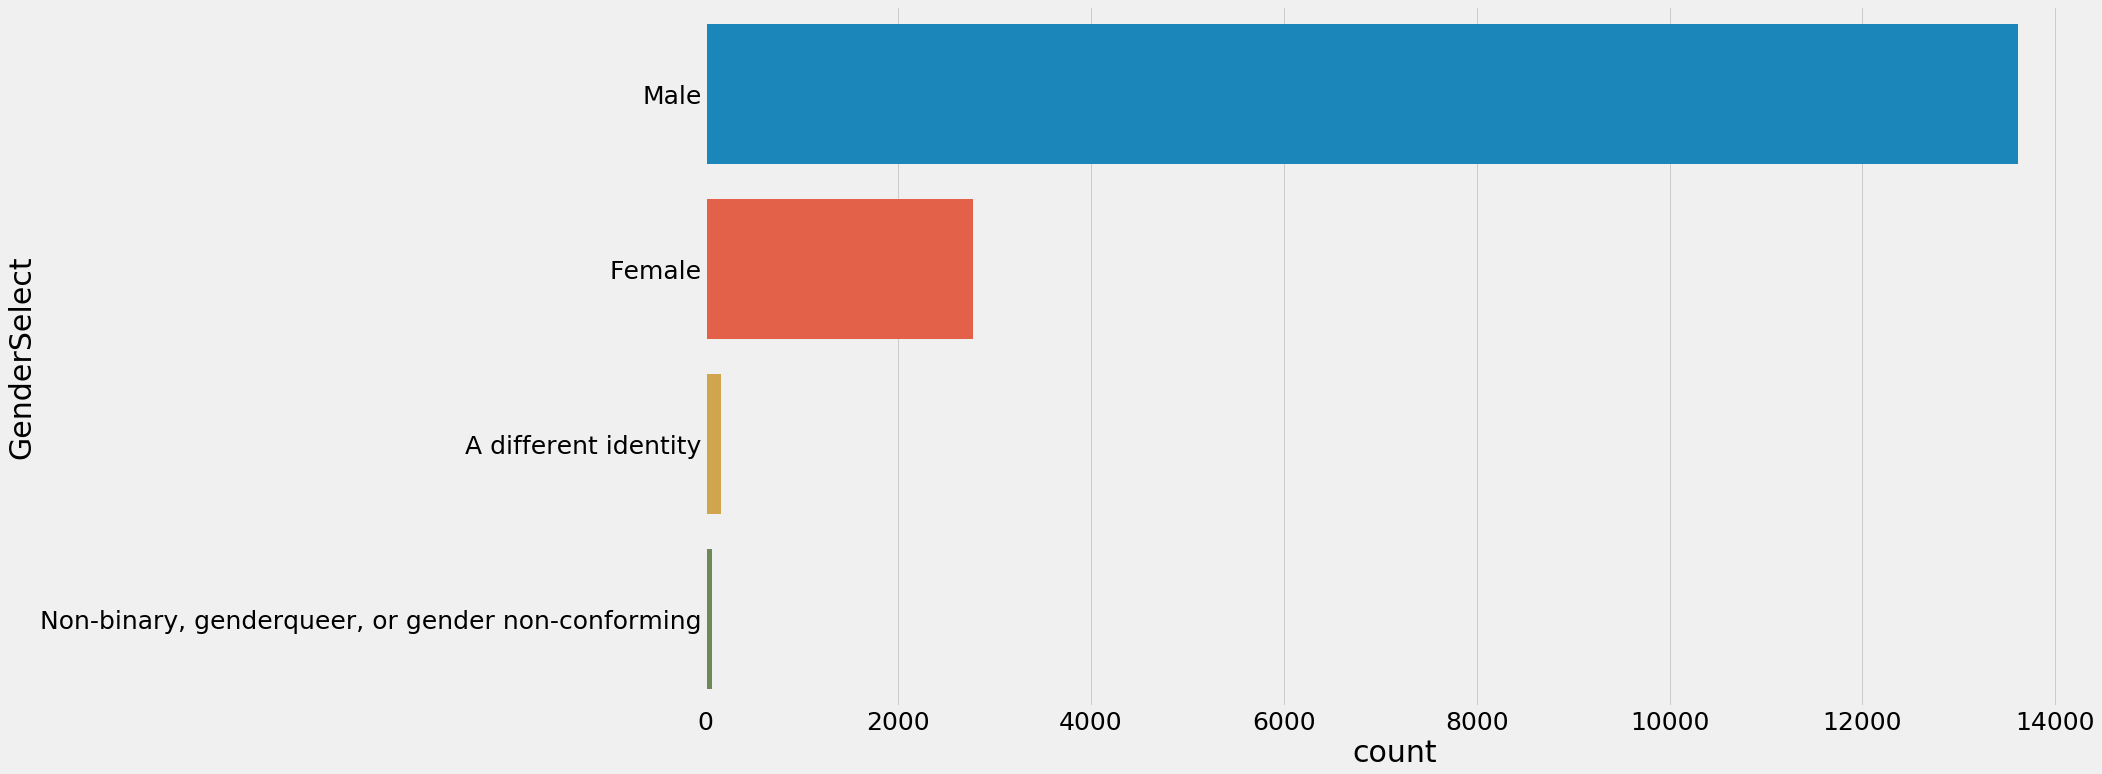

In [22]:
import matplotlib
matplotlib.rcParams.update({'font.size': 25}) # 设置字体的大小

plt.subplots(figsize=(22,12))
# sns.countplot() http://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
# 如果上面这个改成x=response['GenderSelect']，则会是竖形柱状图
plt.show()

不出所料，男的还是占了大多数，符合猜想

## 查看排名人数最多的前15个国家

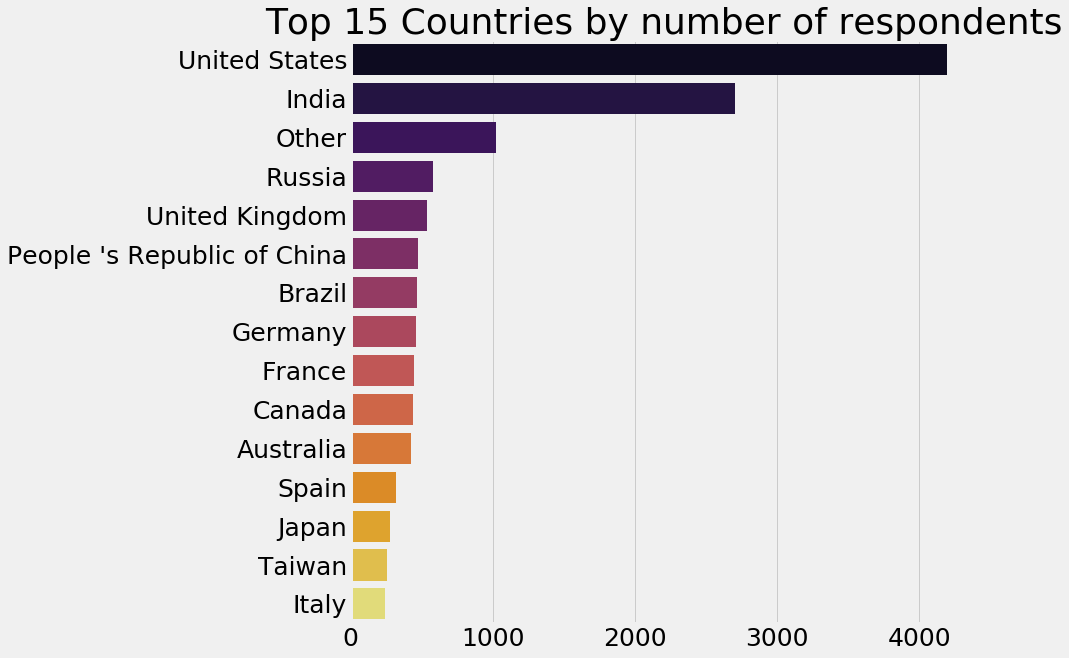

In [24]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
# resp_coun返回一个Series类型数据，其中index为15个国家名称
sns.barplot(resp_coun['Country'],resp_coun.index,palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf() # 获取当前图表对象
fig.set_size_inches(10,10) # 设置尺寸大小
plt.show()

中国才第6

## 在调查问卷中各国的收入情况

In [27]:
pd.set_option('max_rows',20)
response['CompensationAmount']

0            NaN
1            NaN
2            NaN
3        250,000
4            NaN
5            NaN
6            NaN
7            NaN
8          80000
9        1200000
          ...   
16706        NaN
16707        NaN
16708        NaN
16709        NaN
16710        NaN
16711        NaN
16712        NaN
16713        NaN
16714        NaN
16715        NaN
Name: CompensationAmount, Length: 16716, dtype: object

In [28]:
# 有些收入的写法比较特别 ,如要把15,000或15-000转化成15000
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

# 下面这张表展示各个国家的货币转化成美元的汇率（需要将问卷中的工资数据转化为统一单位）
rates=pd.read_csv('conversionRates.csv')
rates.head()

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350


In [29]:
rates.drop('Unnamed: 0',axis=1,inplace=True) # Unnamed: 0这列没用，直接去掉
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer


In [30]:
# 合并两表
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304


In [31]:
# 求出以美元为单位的工资
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


看平均，这个收入应该还不错。这最高工资谁写的？比阿富汗的GDP还高吧...

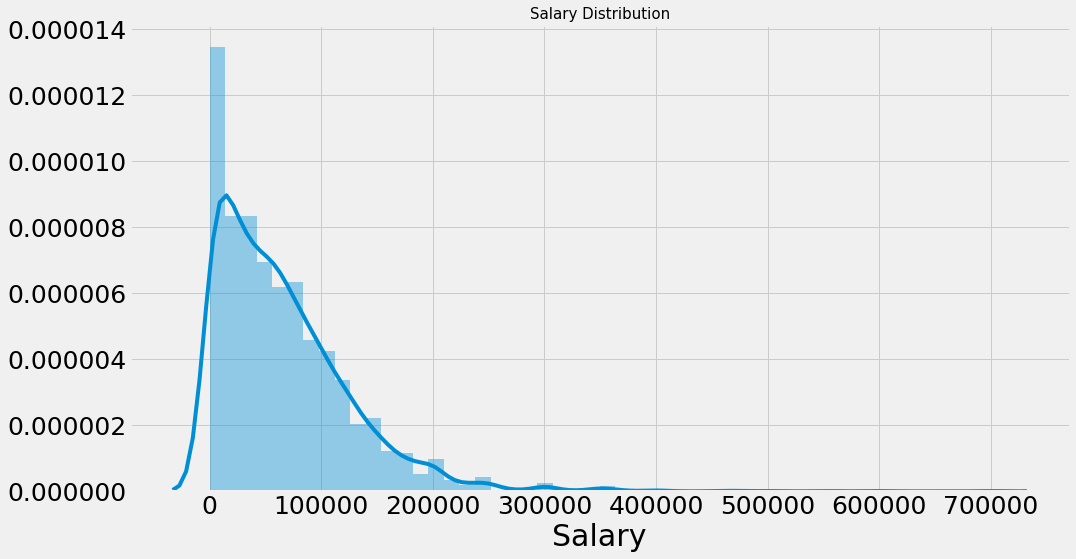

In [32]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000] # 年收入小于100w
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

去掉这些"土豪"（逗比），这就是工资的差不多正常分布了

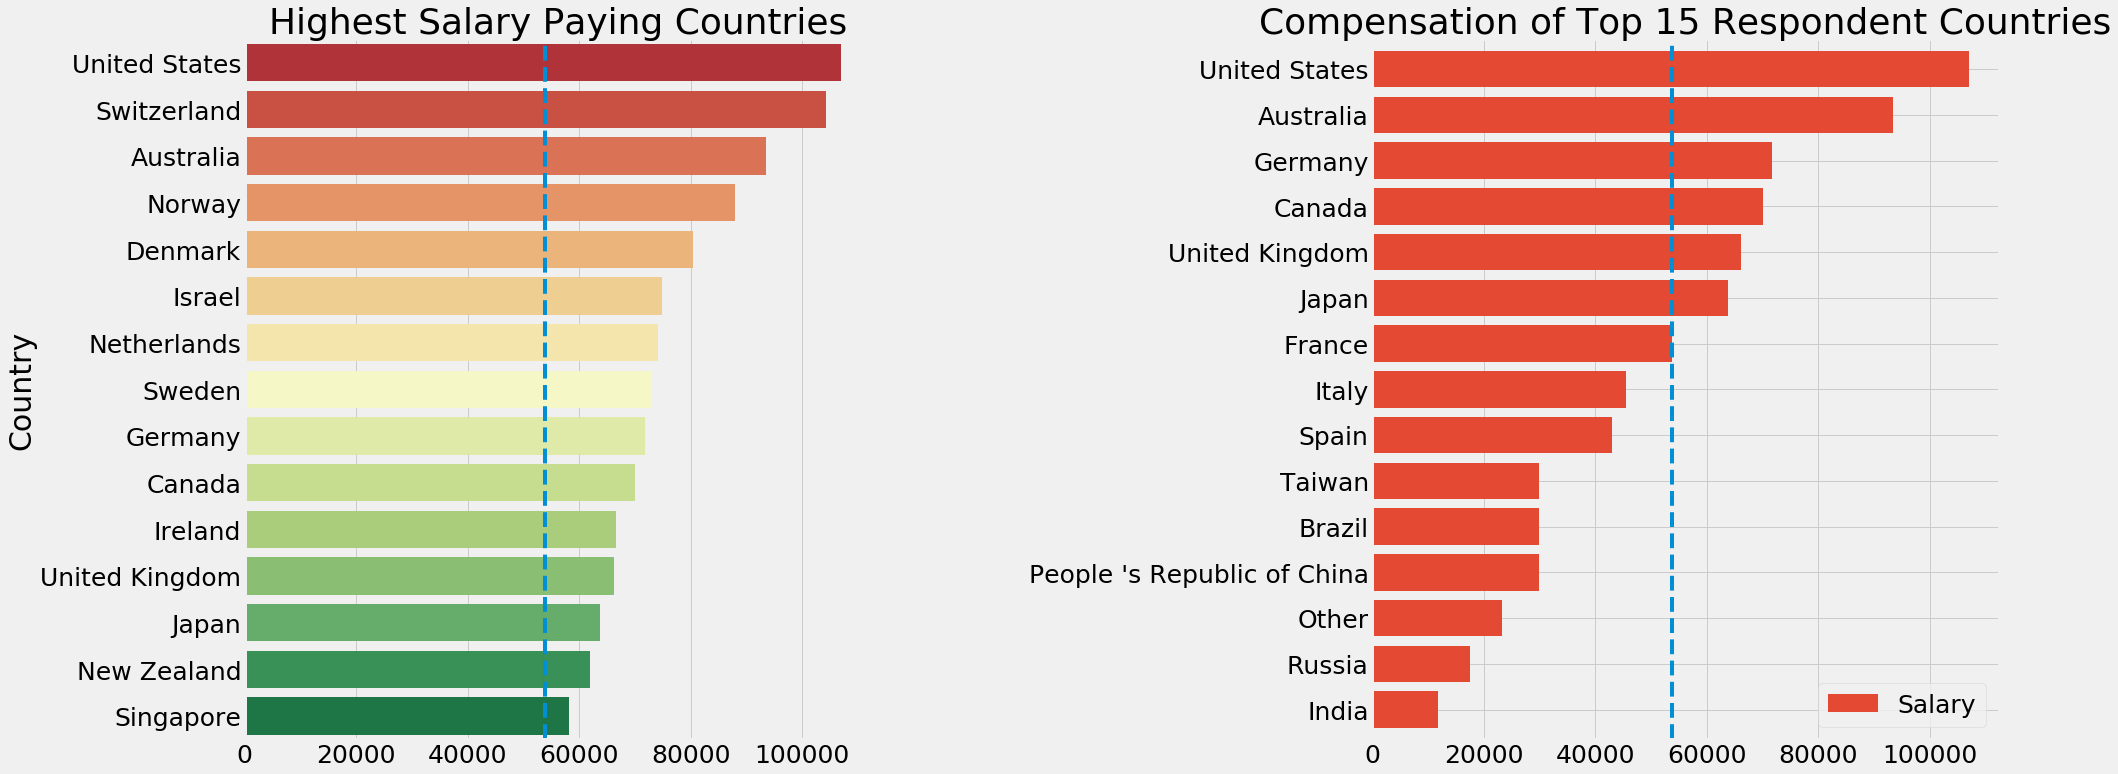

In [50]:
f,ax=plt.subplots(1,2,figsize=(28,12))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
# 下面的'Salary'是sal_coun中的column索引，sal_coun.index为不同国家
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed') # 画出整体垂直中位数线
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

# 查看人口排名最多的15个国家的工资水平
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)] # resp_coun.index是人口排名最多的15个国家
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

竖条的那个是整体的中位数，左边的图中工资排名前15的国家都超过中位数了，右边的图是参与人数最多的15个国家的情况，中国的薪资还是有点低

## 性别对工资的影响大吗？

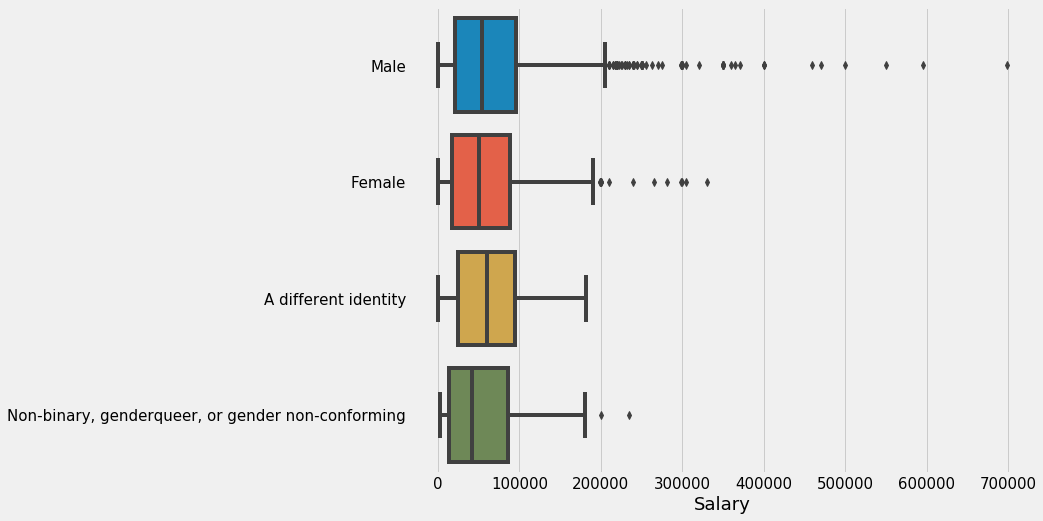

In [56]:
plt.subplots(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.ylabel('')
plt.show()

还可以吧，男性稍微高那么一点。

## 参与调查的几乎都是年轻人吧？

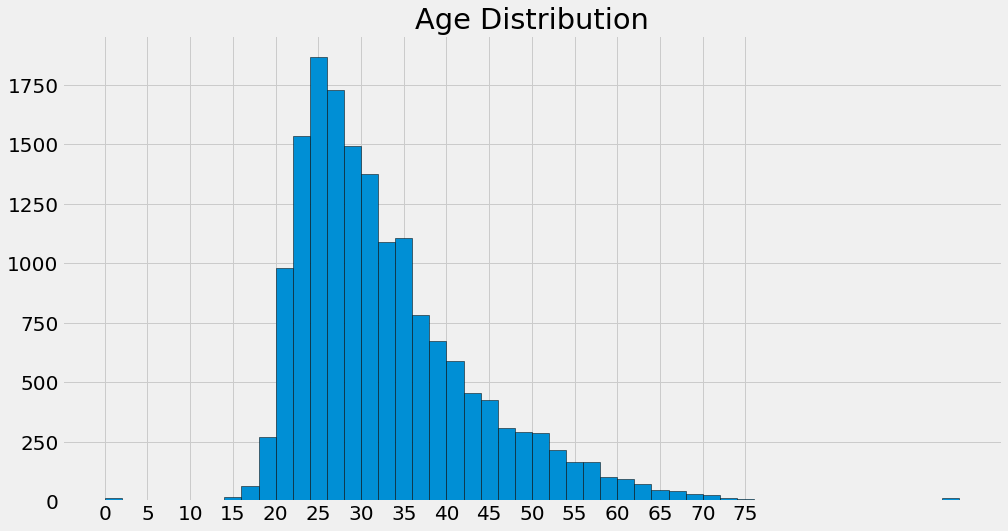

In [57]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black') # 直接用pandas里面的hist画图
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

20-35的人数比较多，50以上的也不少

## 来玩数据的人都是什么专业的？现在又干什么？

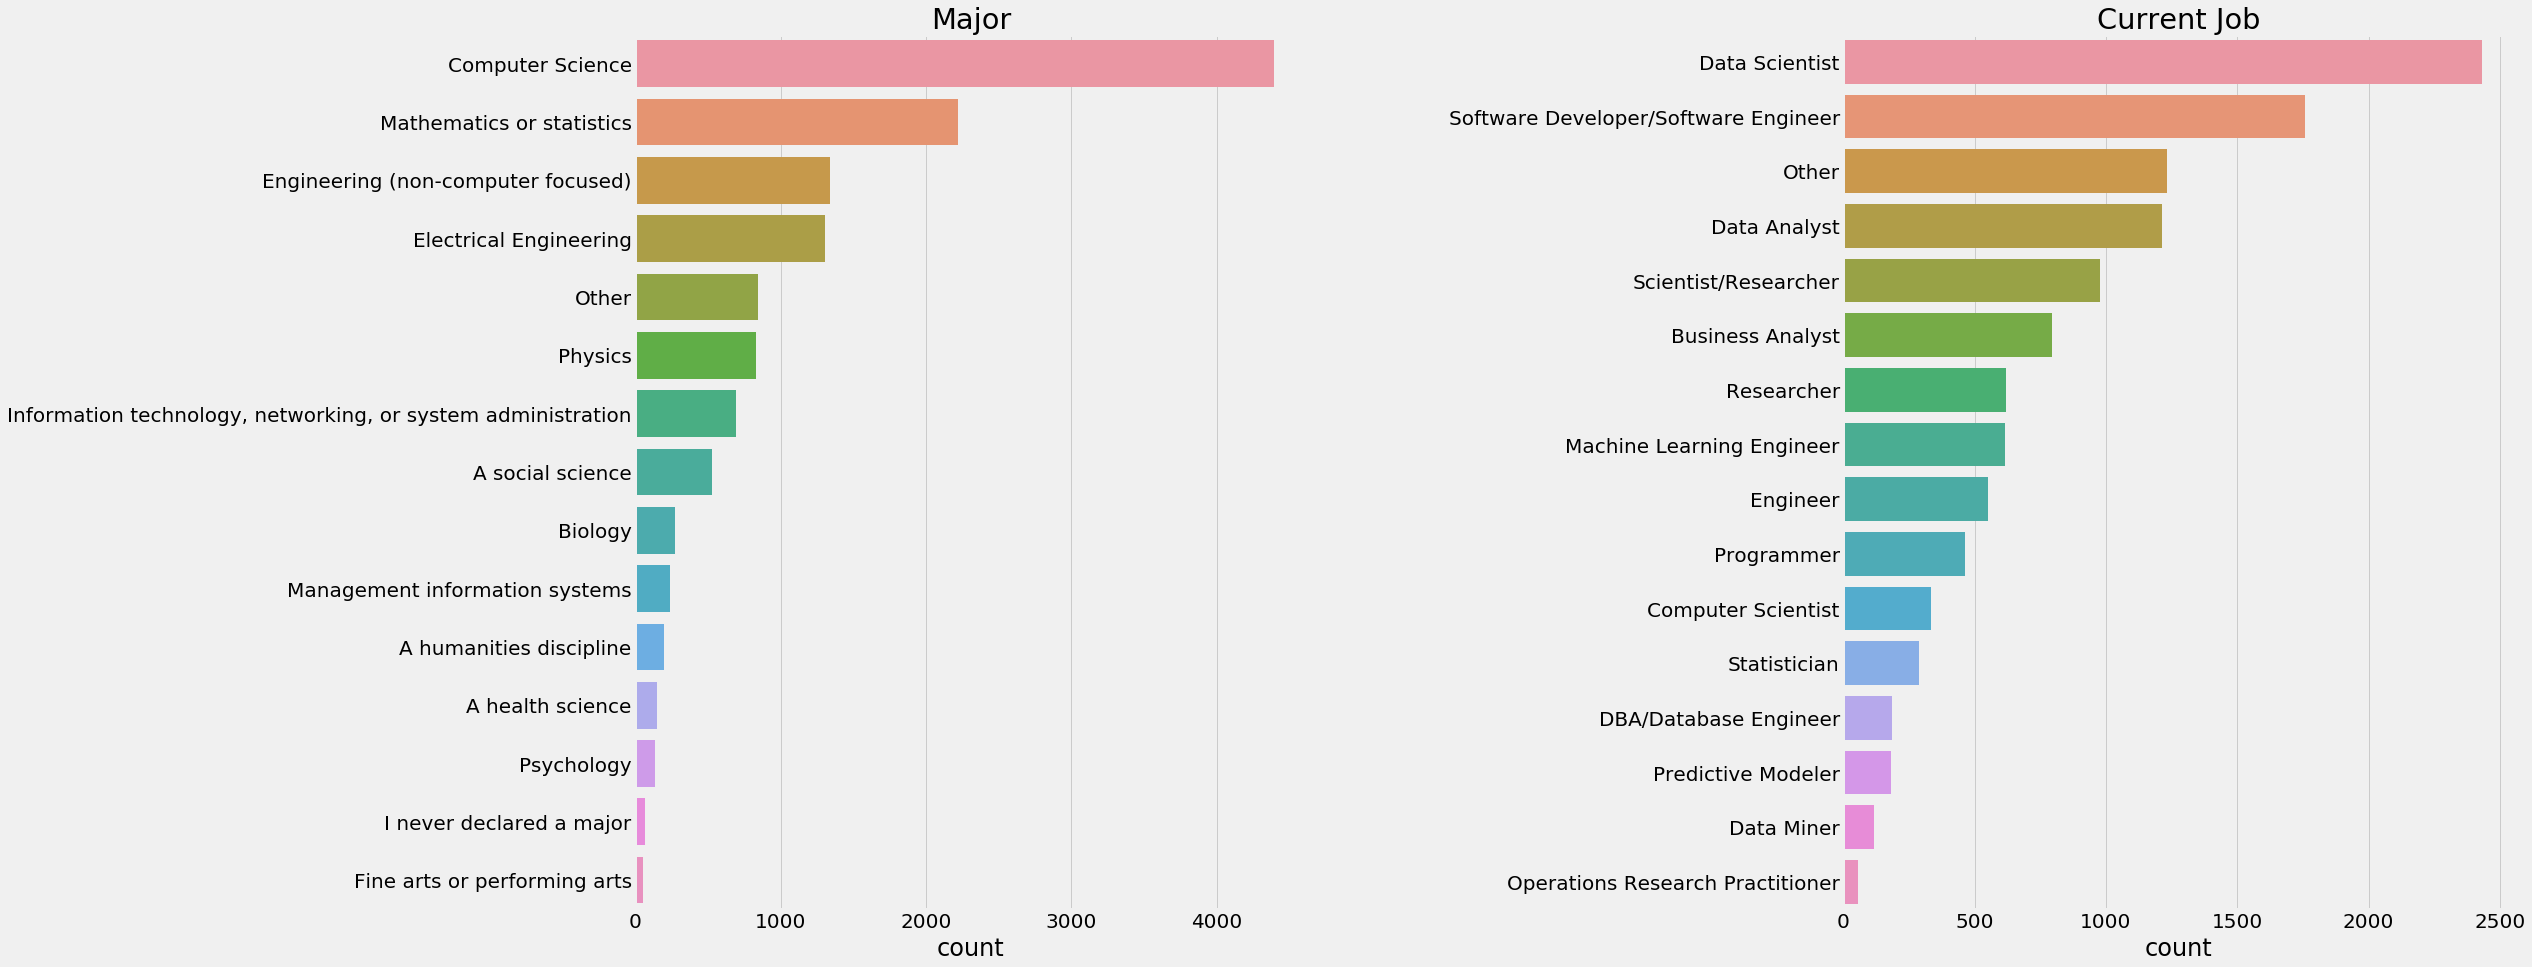

In [58]:
f,ax=plt.subplots(1,2,figsize=(30,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

几乎所有行业都使用数据科学和机器学习。从左图中可以看出这一点，因为来自不同领域的人们，如物理、生物学等，正都在从事数据方面的研究。

右边的图表显示了被调查者当前的工作情况。最多的人是数据科学家

## 这些不同工种的工资怎么样呢？

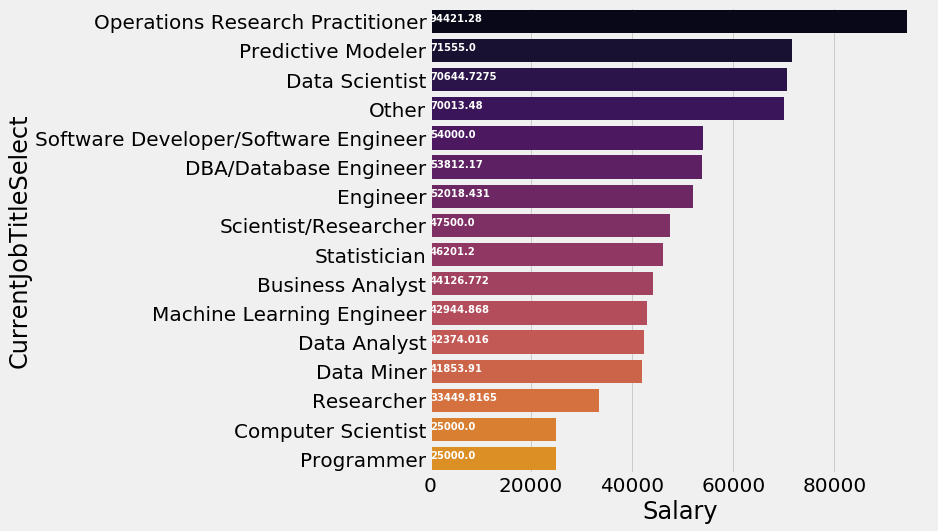

In [63]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary ,sal_job.index ,palette=sns.color_palette('inferno',20))

for i, v in enumerate(sal_job.Salary):   # 在图上添加数字
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
    
plt.title('Compensation By Job Title',size=15)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

运筹学从业者的平均工资中位数最高，其次是预测建模师和数据科学家。计算机科学家和程序员的报酬最低。

In [67]:
response['MLSkillsSelect'].str.split(',') # ML下做的具体行业，Series中每一条数据都是一个列表
# “MLTechniquesSelect”为喜好的具体算法

0        [Computer Vision, Natural Language Processing,...
1        [Computer Vision, Supervised Machine Learning ...
2        [Adversarial Learning, Computer Vision, Natura...
3        [Recommendation Engines, Reinforcement learnin...
4        [Computer Vision, Outlier detection (e.g. Frau...
5        [Natural Language Processing, Supervised Machi...
6        [Natural Language Processing, Supervised Machi...
7                                                      NaN
8             [Supervised Machine Learning (Tabular Data)]
9        [Supervised Machine Learning (Tabular Data), T...
                               ...                        
16706    [Outlier detection (e.g. Fraud detection), Sup...
16707                                                  NaN
16708                                                  NaN
16709    [Recommendation Engines, Supervised Machine Le...
16710                                                  NaN
16711                                                  N

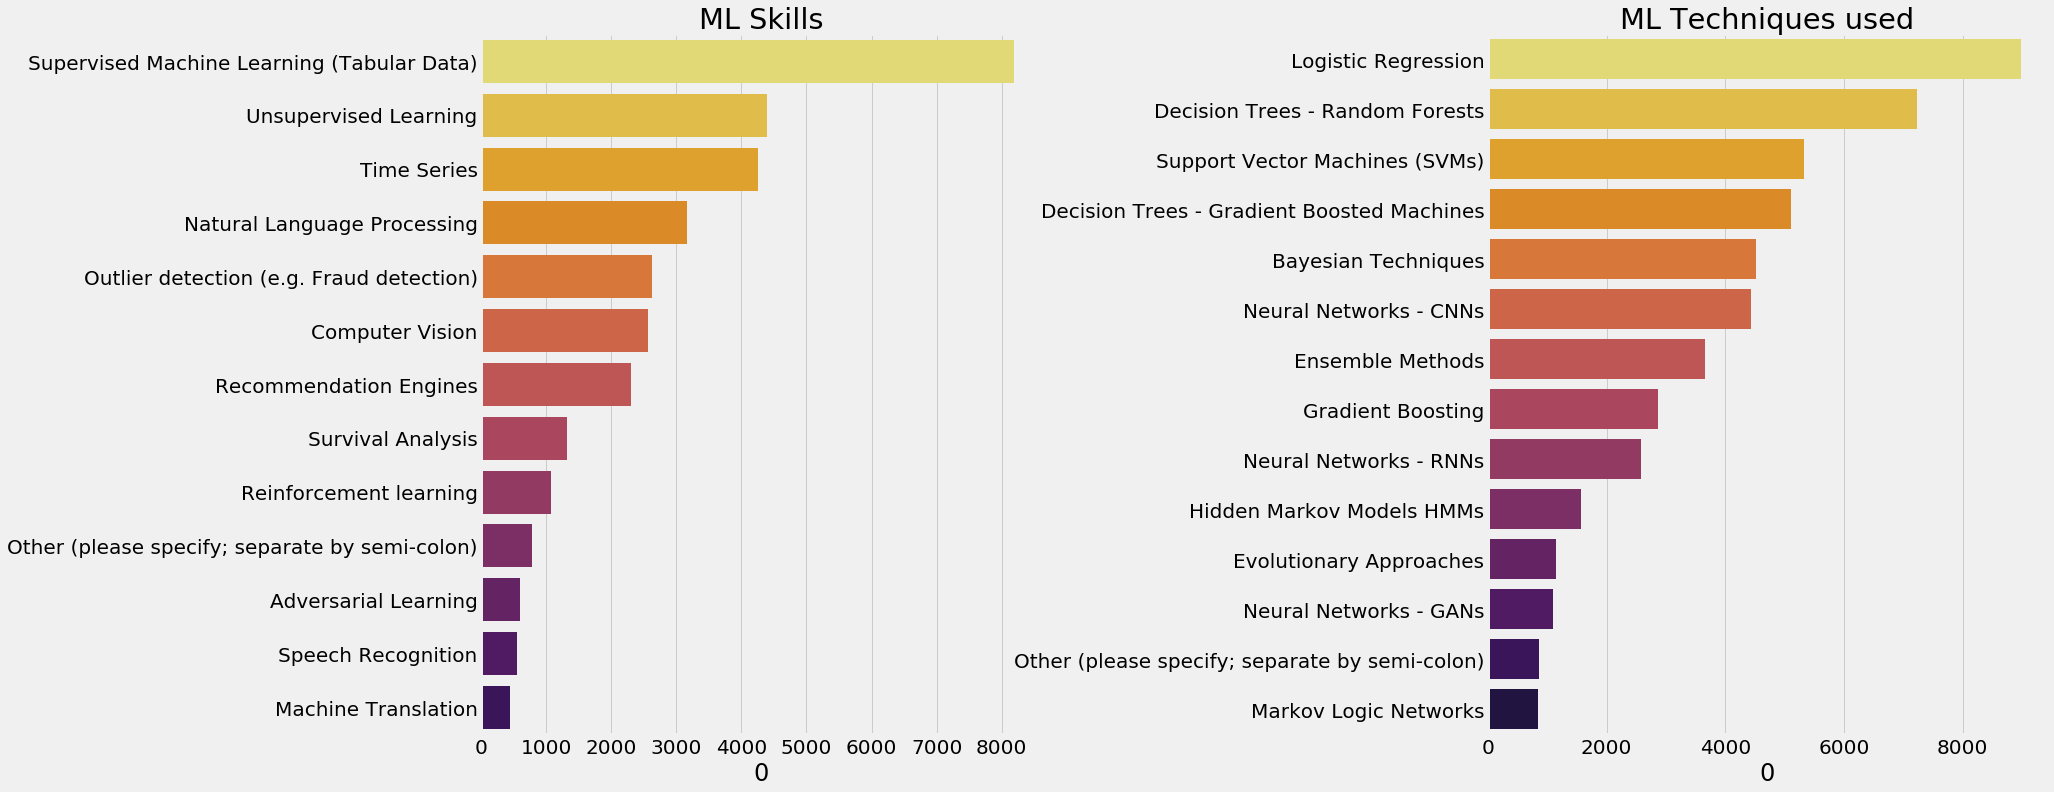

In [79]:
f,ax=plt.subplots(1,2,figsize=(25,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)  # 注意，由于每个i都是一个列表，所以用extend
# 将列表转化为Series类型
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
# plt1[0]就是第一列（实际上只有一列）
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
#for i, v in enumerate(plt1[0]):   # 在图上添加数字(可选)
#    ax[0].text(.5, i, v,fontsize=15,color='white',weight='bold')
ax[0].set_title('ML Skills')


tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

显然，大多数受调查者都从事有监督的学习，而逻辑回归是其中最受欢迎的，但是算法没有高下之分！

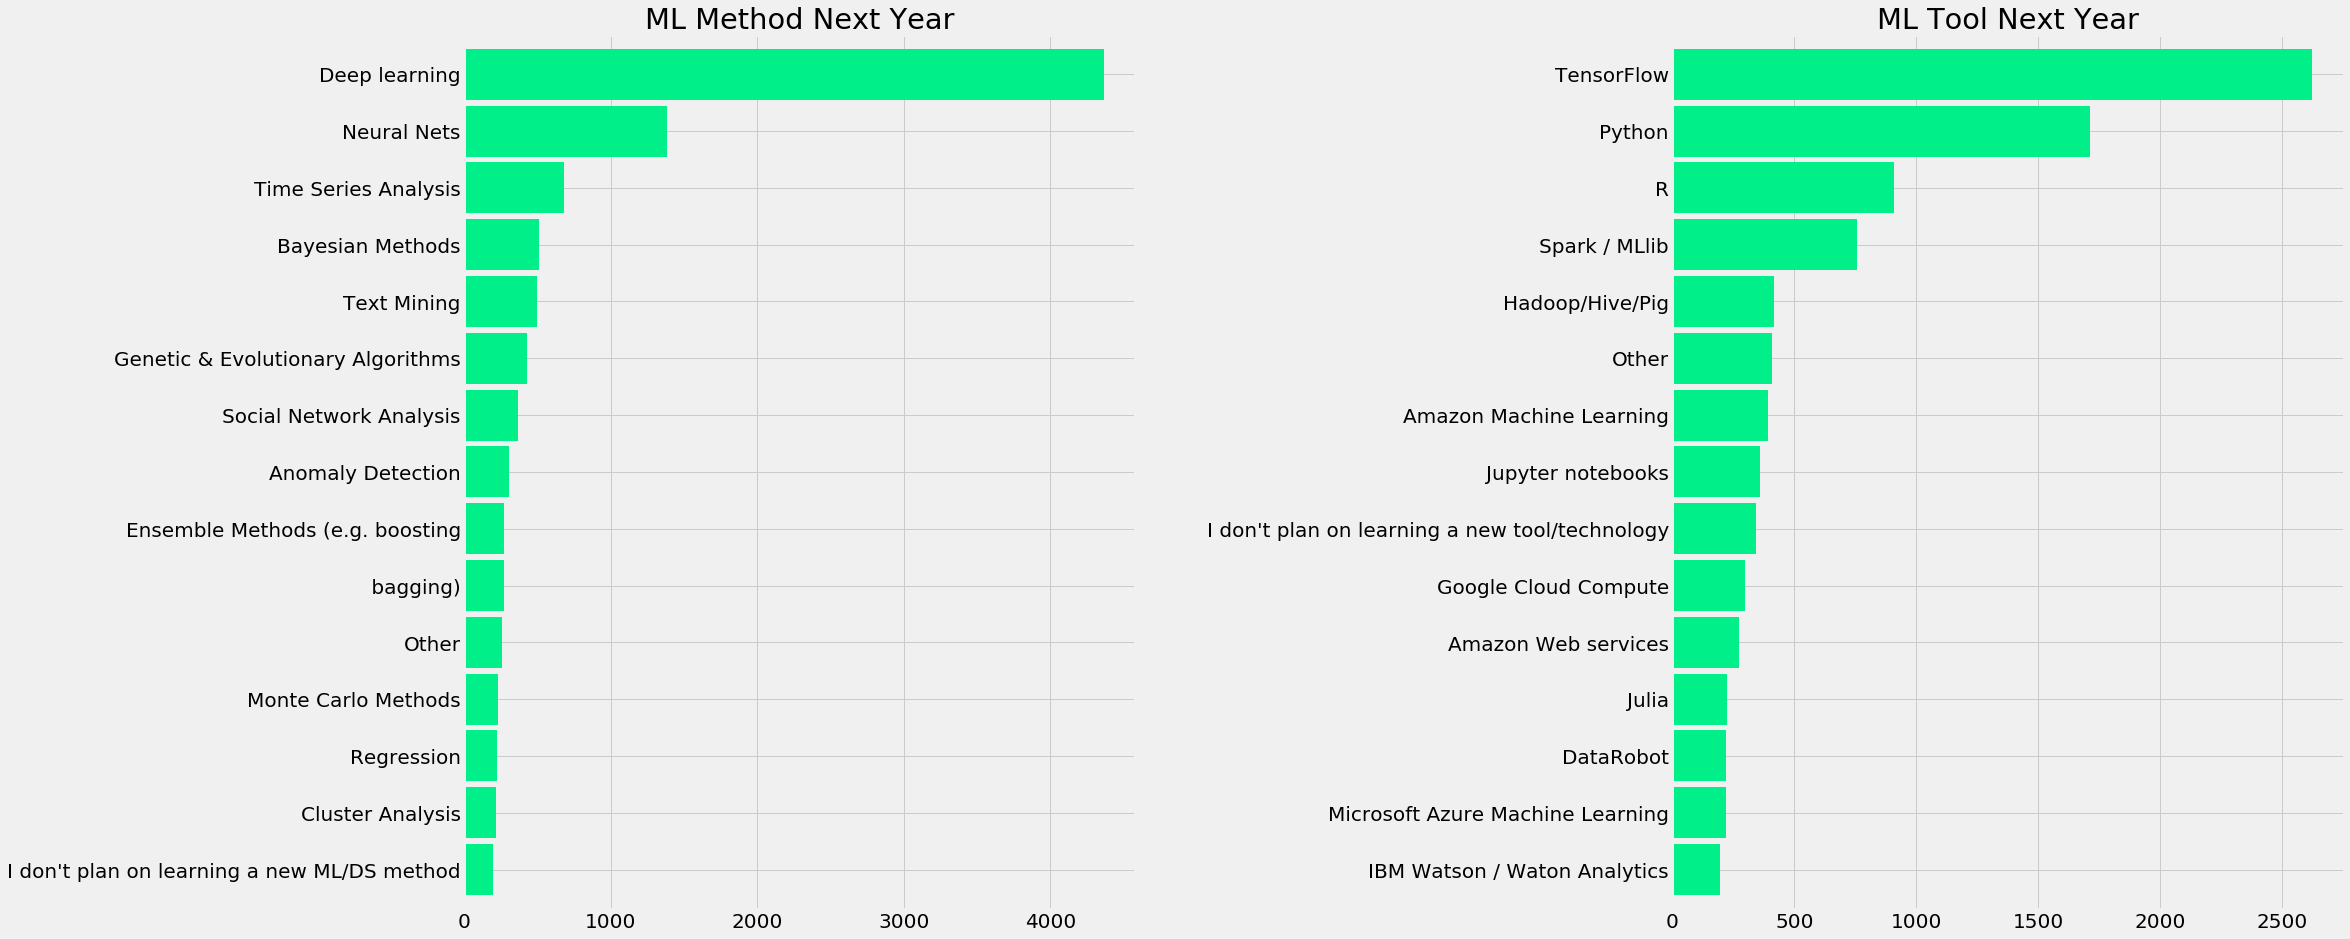

In [81]:
# MLMethodNextYearSelect为调查明年认为那种机器学习方法会受欢迎
f,ax=plt.subplots(1,2,figsize=(30,15))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

很明显，下一年将会有更多的深度学习者。深入学习和神经网络或短期AI是明年最受欢迎的热门话题。此外，在工具方面，Python比R更受欢迎。

## 数据科学的平台，大家比较喜欢哪一个？

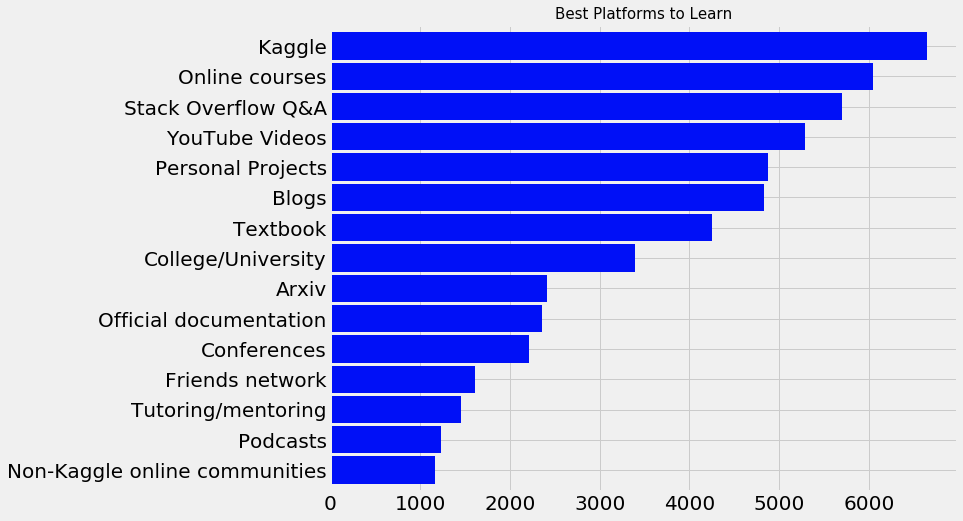

In [82]:
plt.subplots(figsize=(10,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)

pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter',15))

plt.title('Best Platforms to Learn',size=15)
plt.show()

kaggle还是非常不错的平台的

## 被调查者的设备怎么样

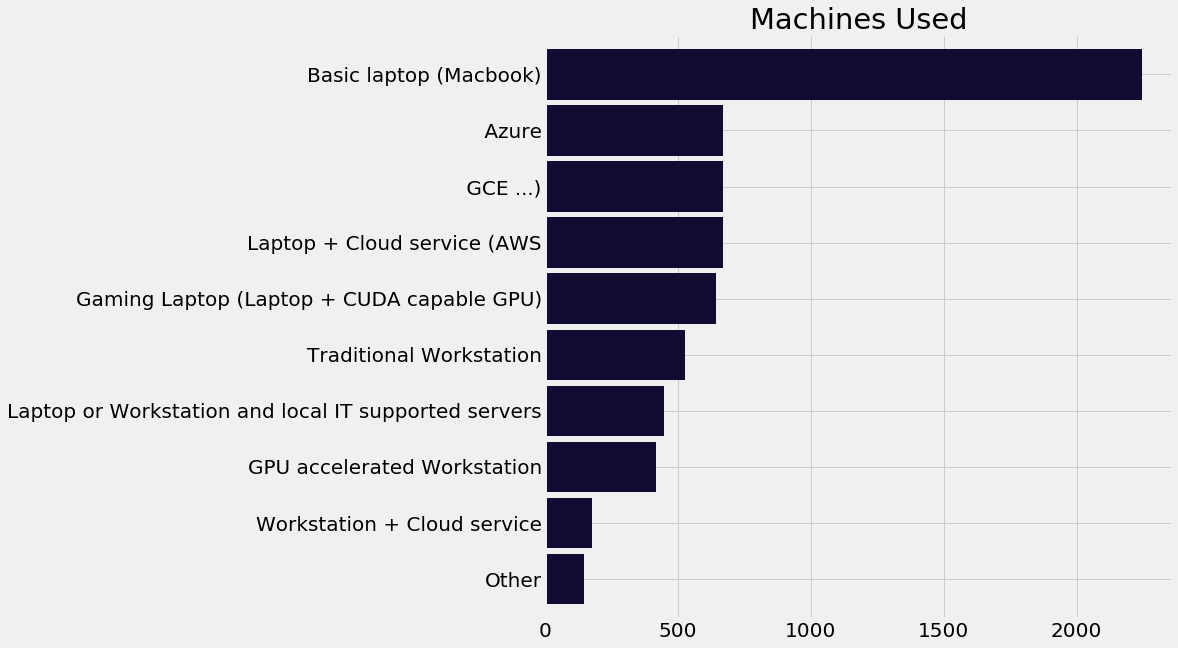

In [84]:
plt.subplots(figsize=(10,10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()

有些高配玩家，但是通常还是笔记本为主

## 数据集哪里找？

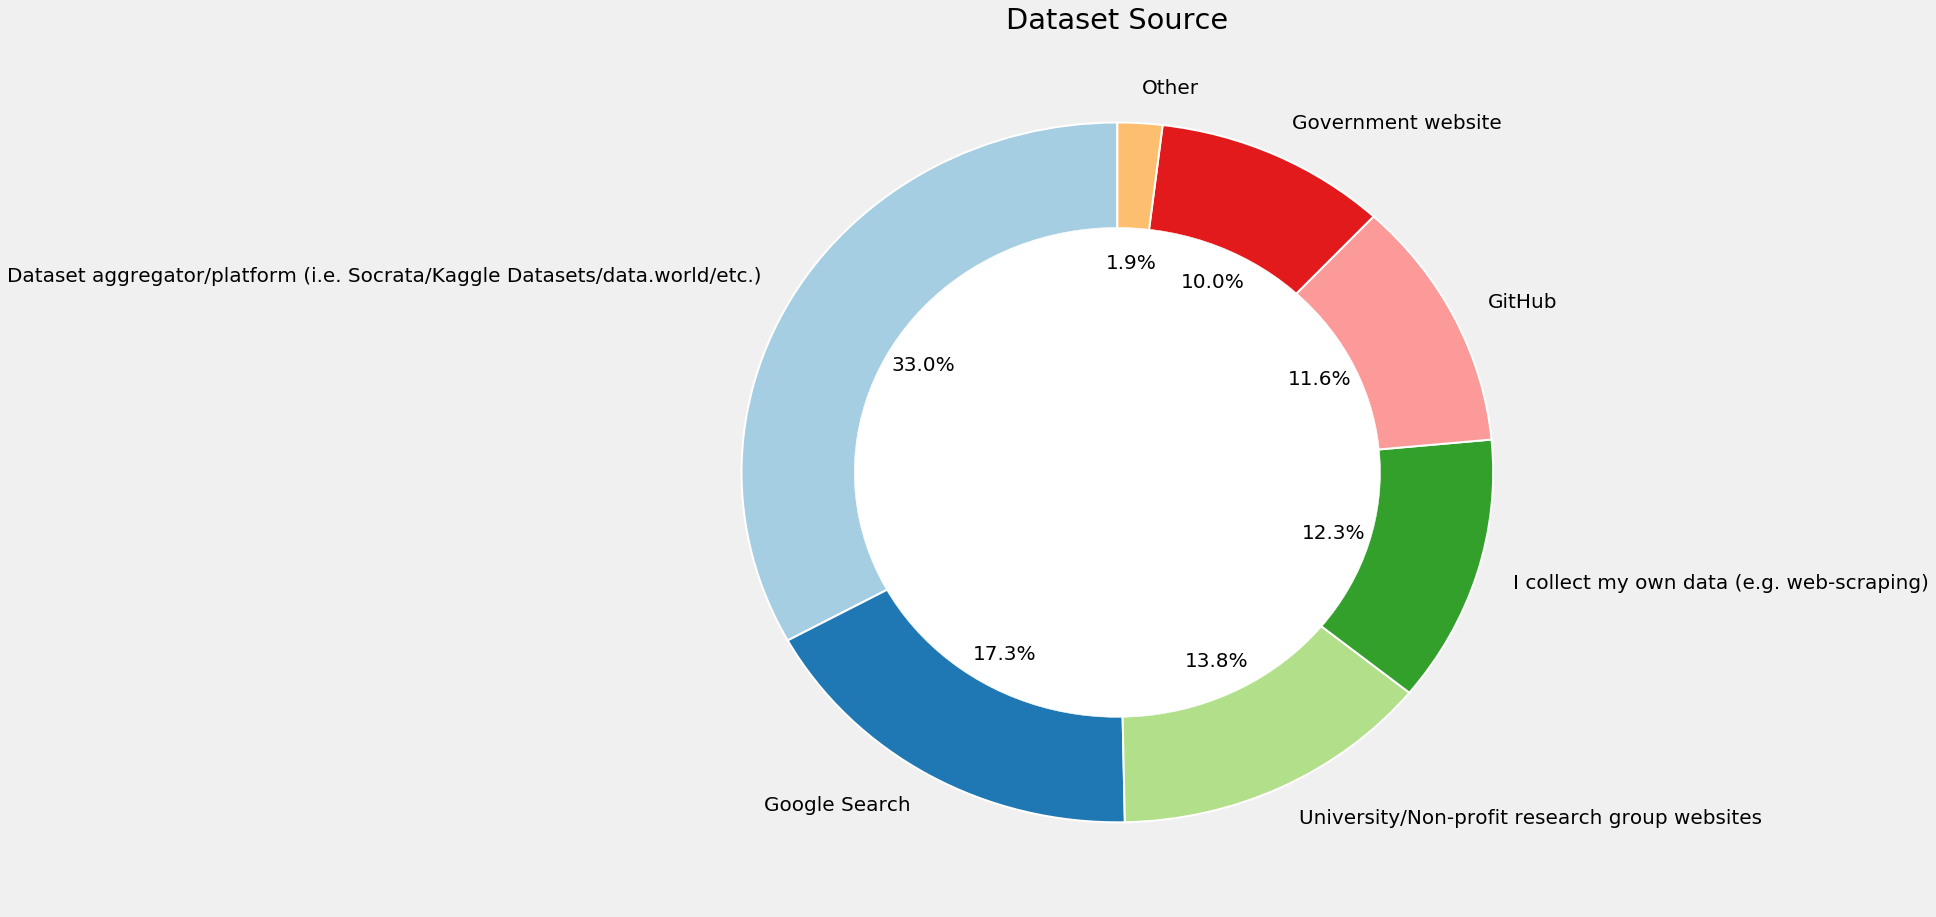

In [85]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
    
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

各种渠道都有

## 开源的代码在哪里找？

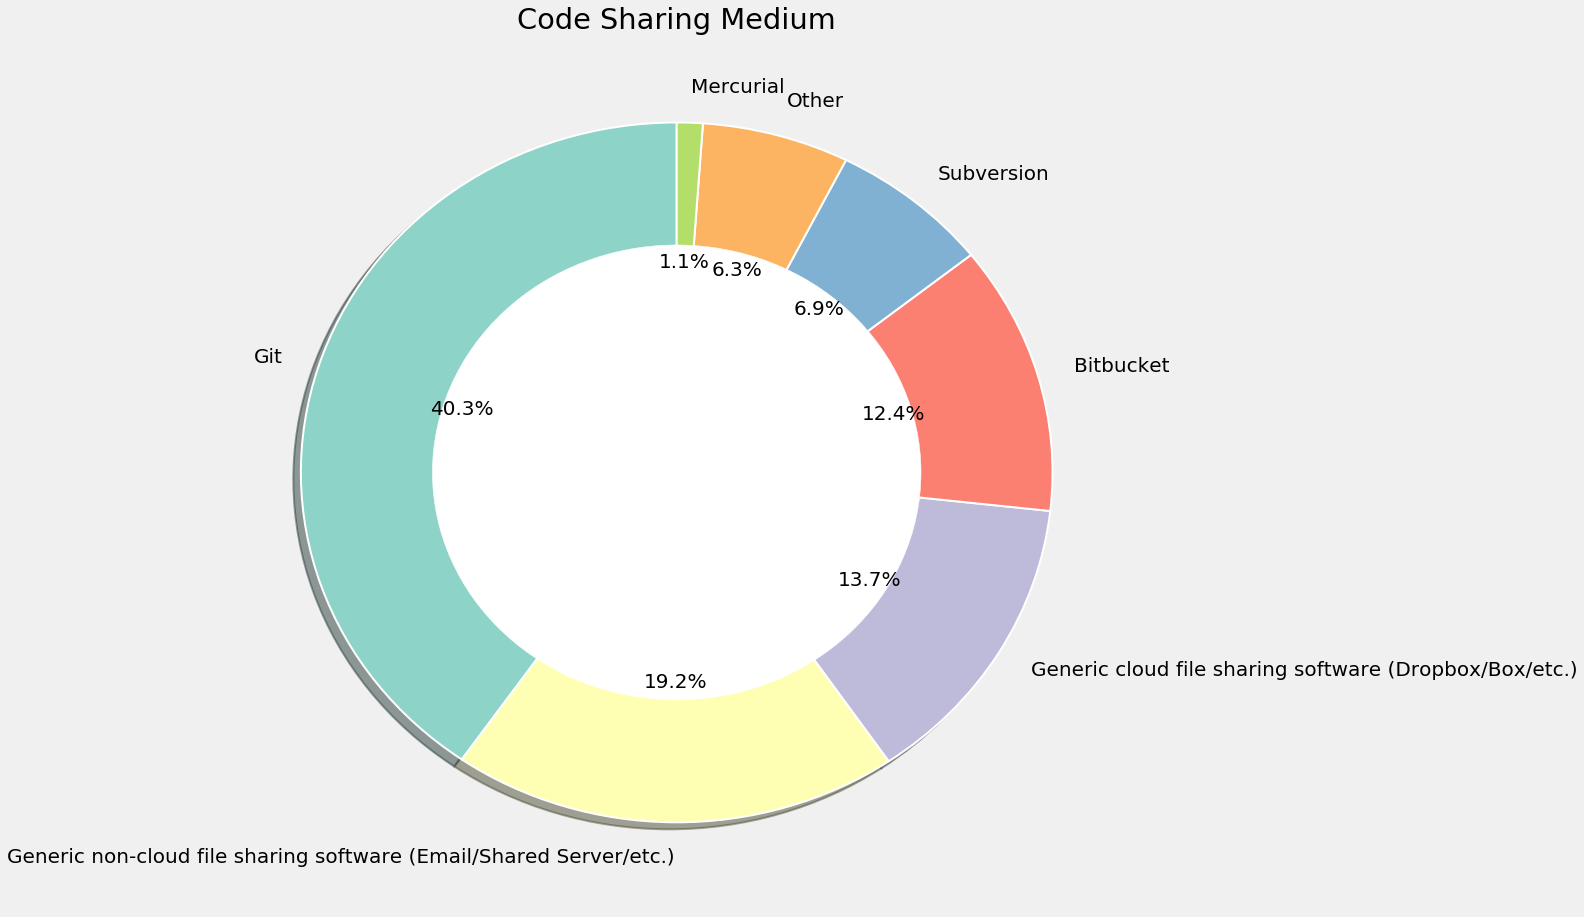

In [87]:
plt.subplots(figsize=(15,15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)

pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set3',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

plt.title('Code Sharing Medium')
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

github肯定是第一选择了！

## 数据科学面临的挑战

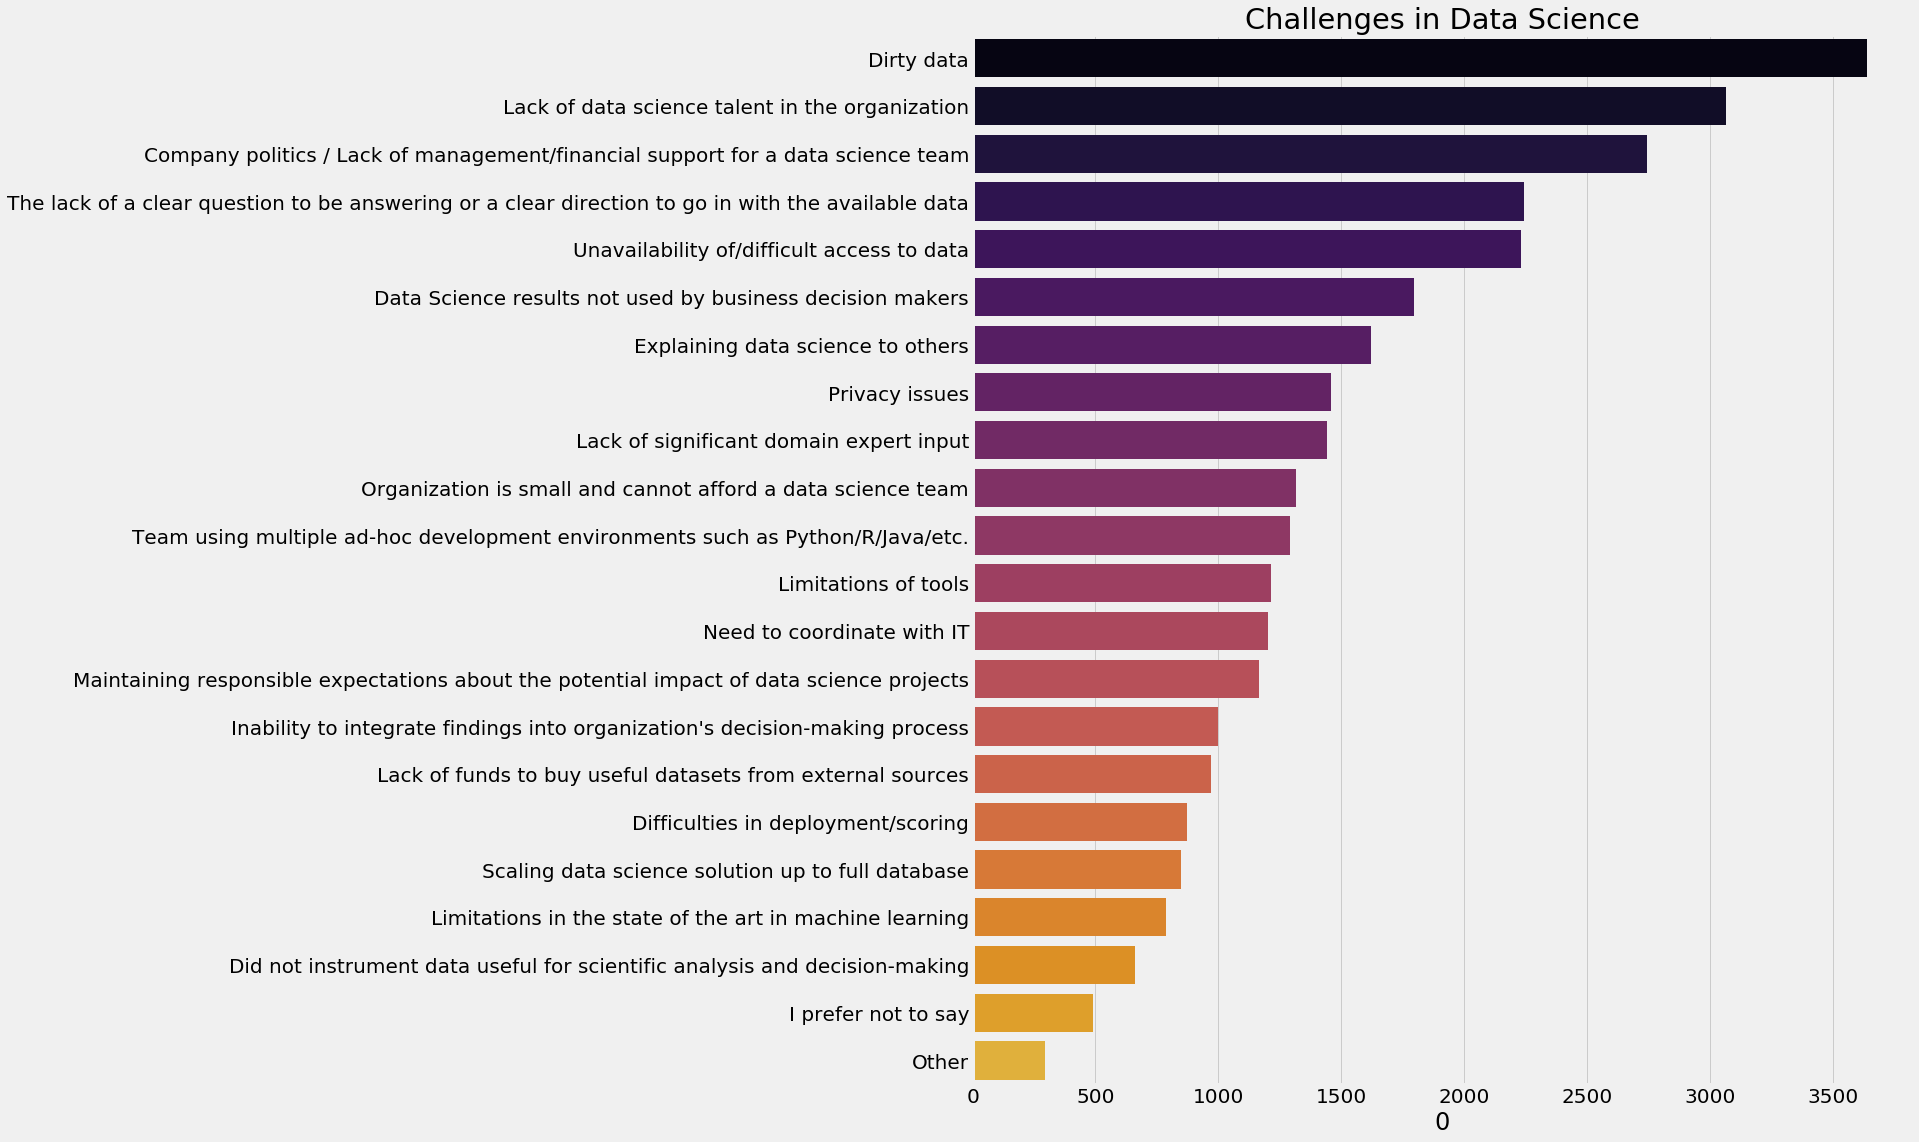

In [88]:
plt.subplots(figsize=(15,18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()

sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))

plt.title('Challenges in Data Science')
plt.show()

最大的挑战看起来是获得最干净的数据

## 干这行的人，满意度怎么样

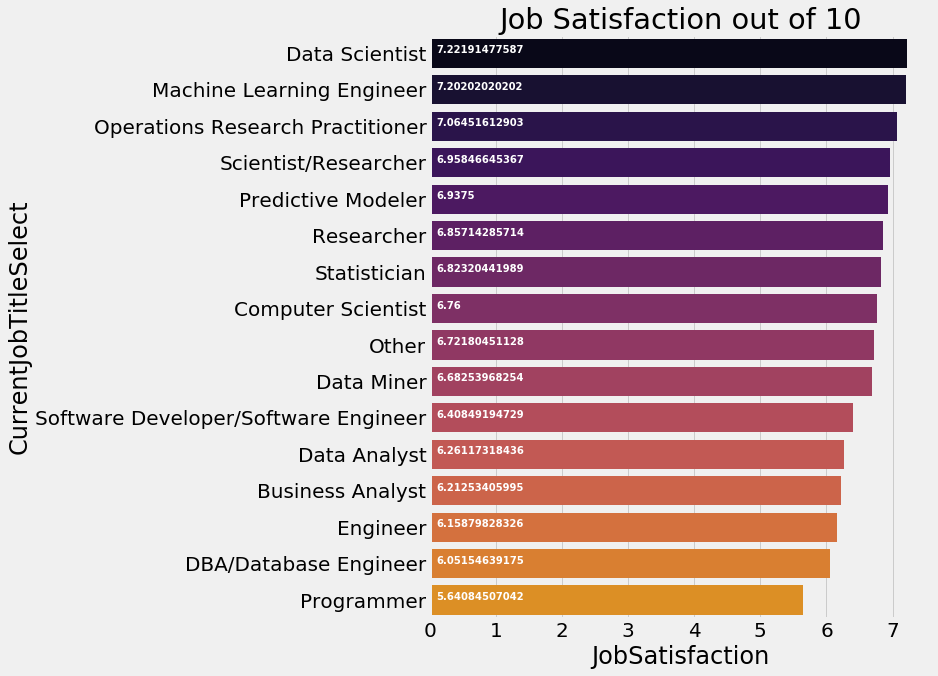

In [90]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
# ↑将satisfy['JobSatisfaction']中的'10 - Highly Satisfied'替换为10......
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
# ↑在不同工作种类中满意度的平均值
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))

fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

数据科学家和机器学习工程师是最满意的人，而程序员的工作满意度最低。

## Python vs R or (Batman vs Superman)

Python和R是用于数据科学和机器学习的最广泛使用的开源语言。对于一个初露头角的数据科学家或分析师，最大和最棘手的疑问是：我的语言开始？虽然两种语言都有各自的优点和缺点，但在选择自己的语言时，这取决于个人的目的。这两种语言都能满足各种不同工作的需要。Python是一种通用的语言，因此，Web和应用集成更容易，而R是为了纯粹的统计和分析的目的。

（PHP是世界上最好的语言。。。）

In [92]:
rates.head() # 汇率

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [93]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


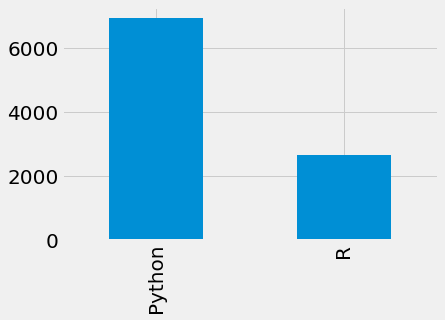

In [96]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
# ↑以resp['CompensationCurrency']为键在右边连接上rates的'originCountry'
# resp['CompensationCurrency']和rates['originCountry']的键（都是货币类型）都是一样的，所以以它为标准融合

python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
# python为只会用python的人，R为只会用R的人，both是两者都会的人
# resp['WorkToolsSelect']字段中包含Python和R的全部条数据传给both

response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

## 有多大用，大家怎么说的？

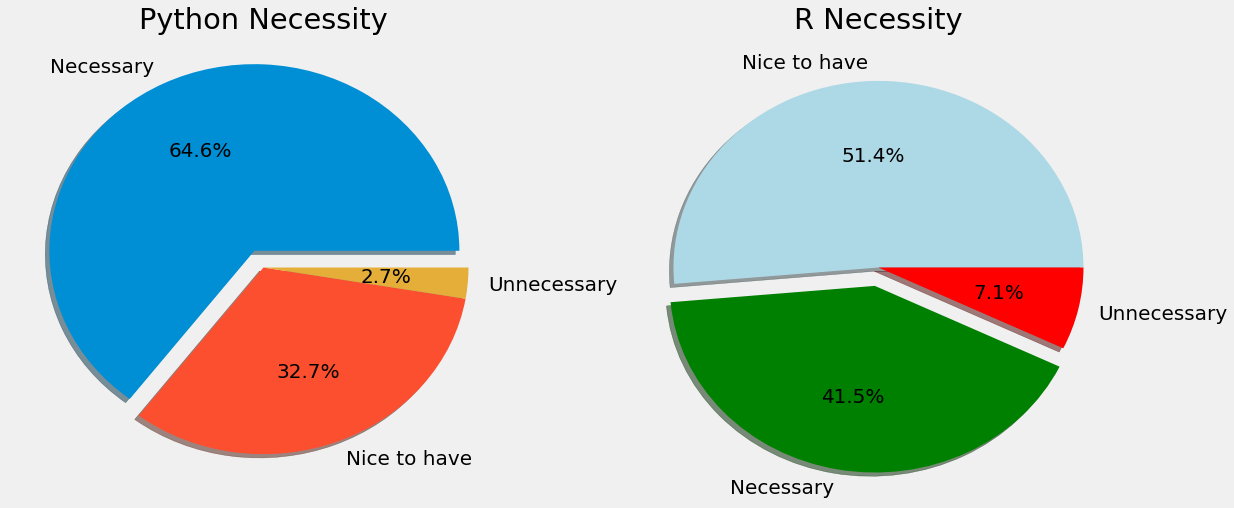

In [99]:
f,ax=plt.subplots(1,2,figsize=(18,8))

response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True)
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')

response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')

plt.show()

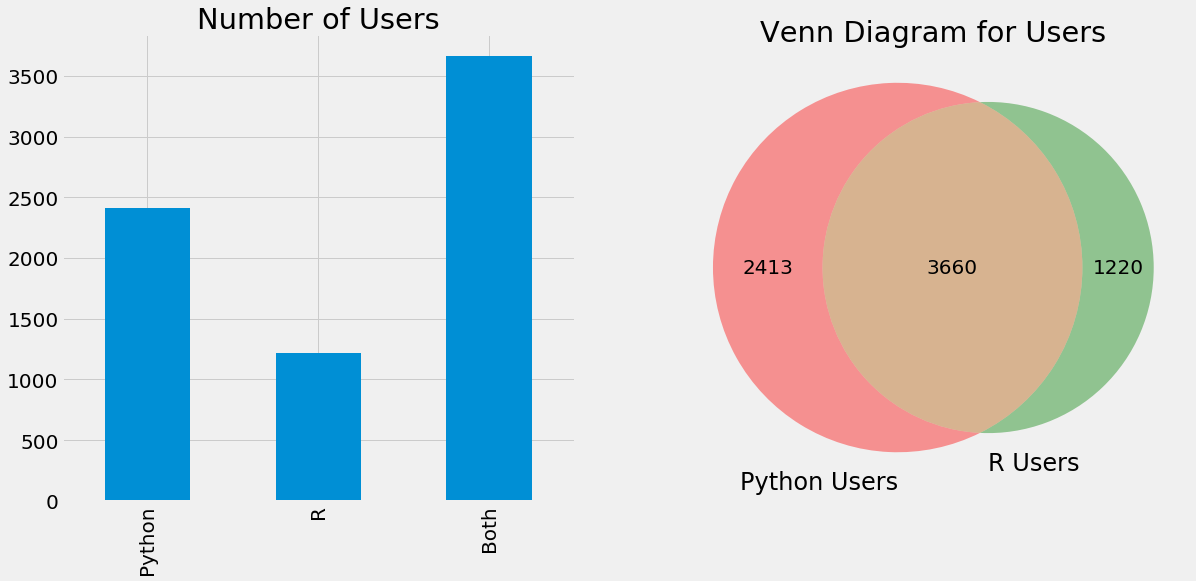

In [101]:
from matplotlib_venn import venn2
# pip install matplotlib_venn 画交集用
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')

venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
# ↑输入是：只会python的，只会R的，两者都会的
plt.title('Venn Diagram for Users')
plt.show()

看来有很多高手是通杀！

## 高手的薪资会不会更高？

In [103]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]

R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]

both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]

In [113]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
# py_sal是一个Series，不过index中会有一些值缺失(因为py_sal[py_sal<1000000])，
# index大概像[7,8,10,11...]，而不是[0,1,2...]

R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]

both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]

trying=pd.DataFrame([py_sal,R_sal,both_sal])
# 三个Series做pd.DataFrame会以Series的index作为columns，所以trying中会有很多NaN值，不过不影响最后的平均数计算
trying=trying.transpose()
trying.columns=['Python','R','Both']

print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


## 不同工种的偏好

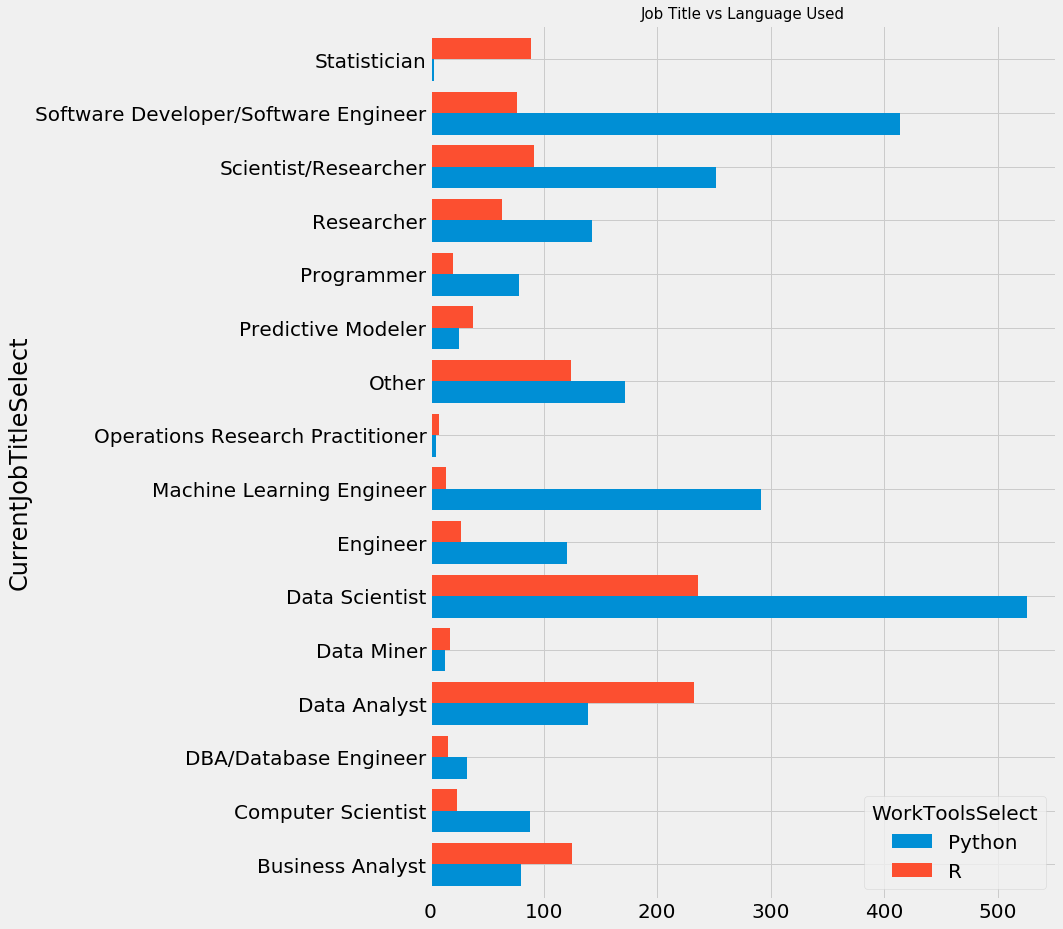

In [124]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r]) # 增加了一列"WorkToolsSelect"，这列只有两个值，"Python"和"R"

r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
# 'Age'比较齐全，所以选用'Age'来作为数量统计
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
# 等于 r_vs_py.pivot(index='CurrentJobTitleSelect', columns='WorkToolsSelect', values='Age')

fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

# 下面这种图适合先做数据透视表，再画

r在视觉上胜过Python。因此，拥有诸如数据分析师、业务分析师等职位头衔的人在图形和视觉上扮演着非常重要的角色，他们喜欢R而不是Python。同样，几乎90%的统计人员使用R，正如前面所述，Python在机器学习方面更好，因此机器学习工程师、数据科学家和DBA或程序员等其他人更喜欢Python。

## 使用语言多少年？

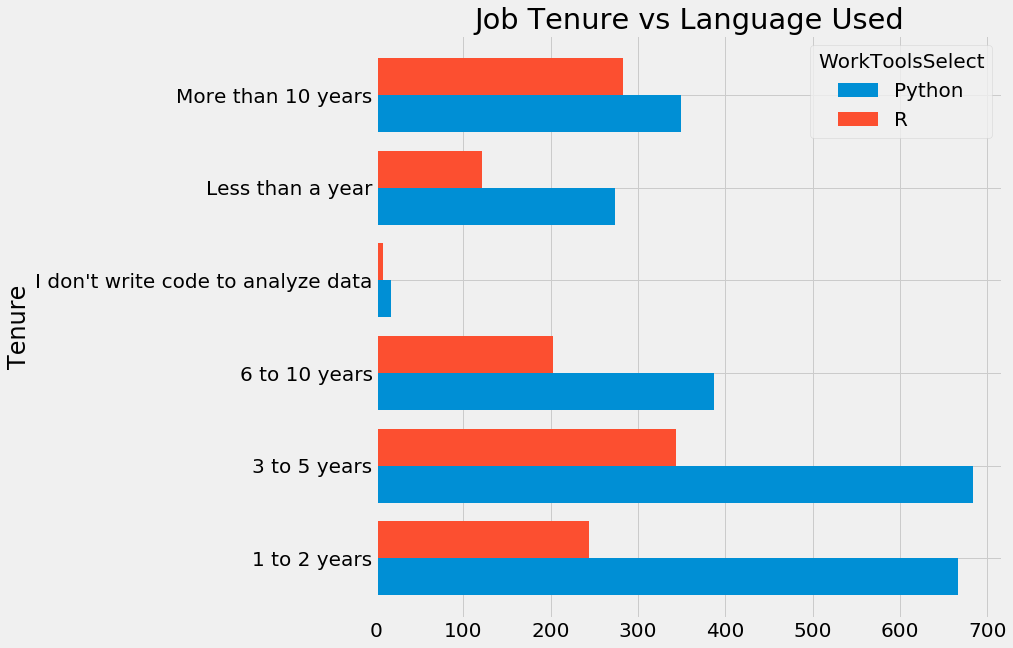

In [129]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

# 下面这种图适合先做数据透视表，再画

Python初学者会更多一些的！

## 不同的行业用哪门语言？

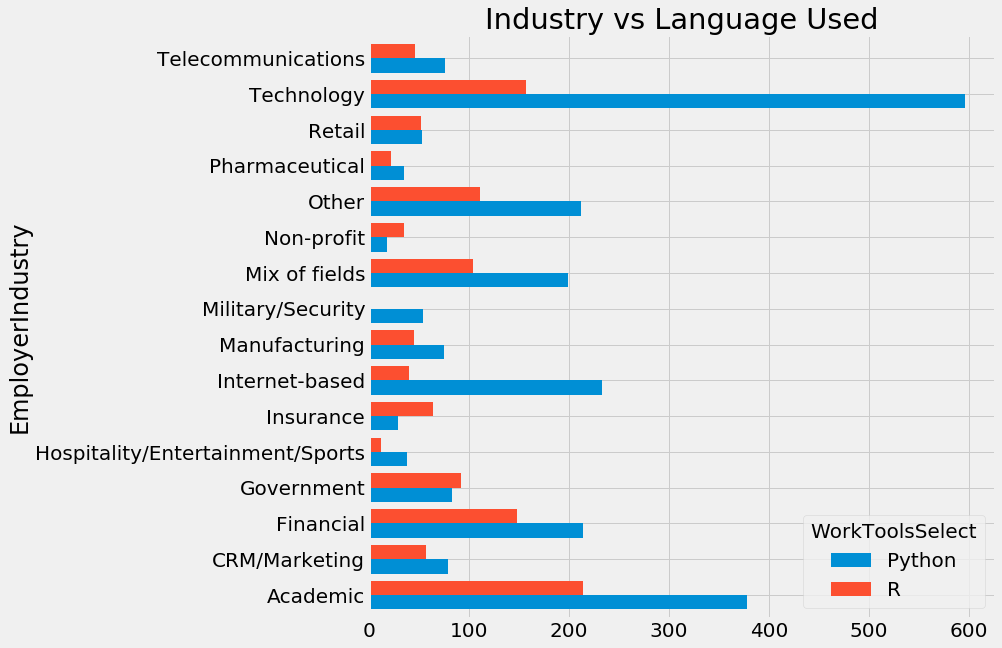

In [130]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

# 下面这种图适合先做数据透视表，再画

r在政府部门还是很强大的，在剩下的其他行业中，Python的份额大约比R高出15-20%。

## Python与R分别最常使用的工具是什么?

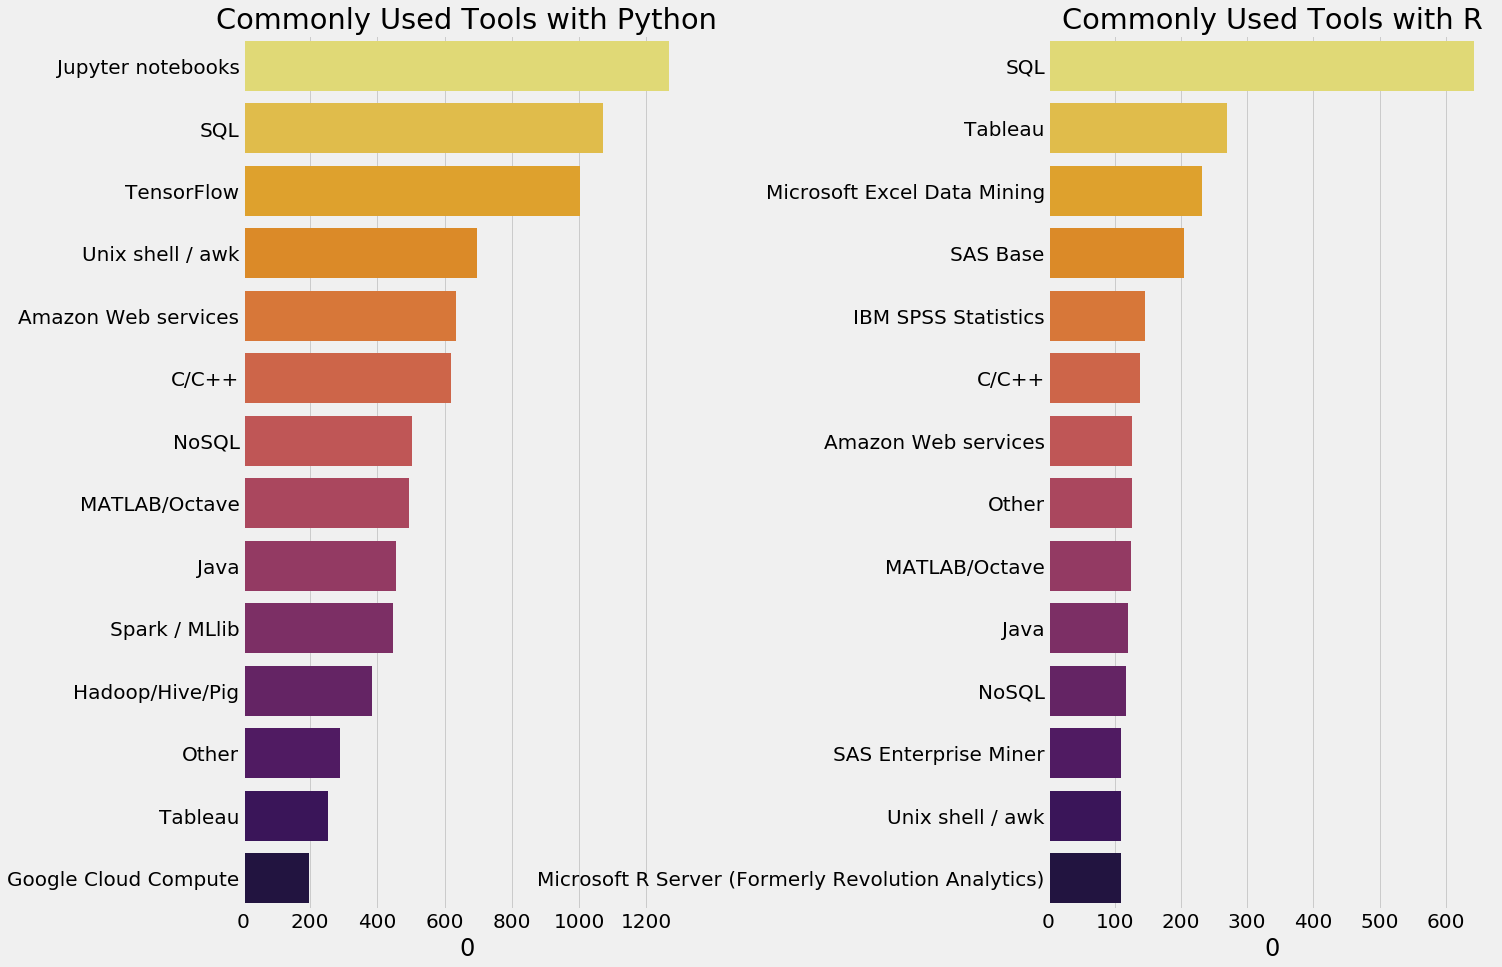

In [131]:
f,ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))

R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))

ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

SQL似乎使用了语言最常见的补充工具。SQL是查询大型数据库的主要语言

## 数据科学家们都做什么

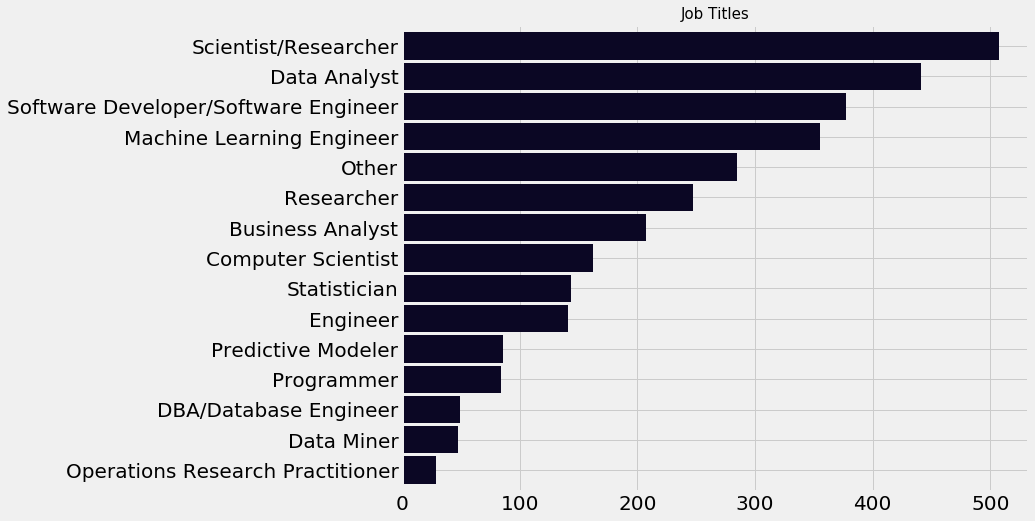

In [132]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.title('Job Titles',size=15)
plt.show()

## 他们都在哪些国家？

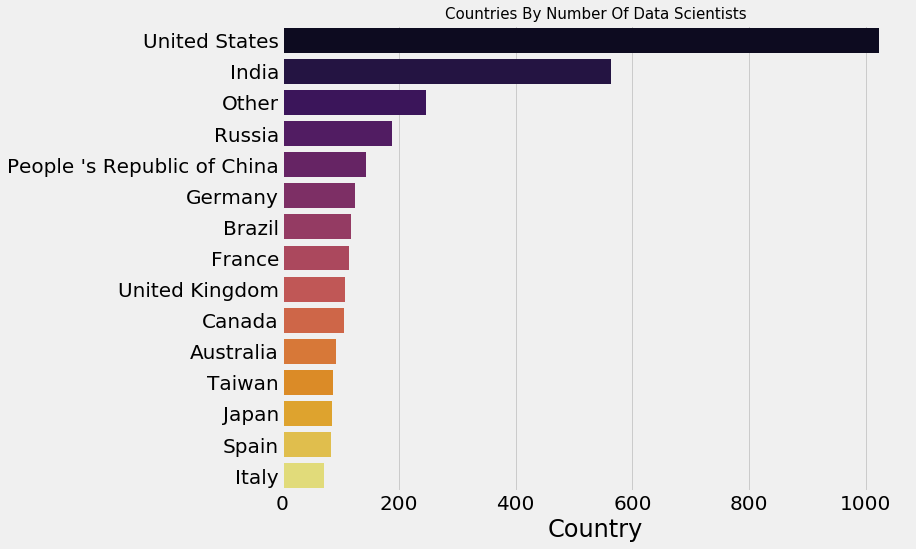

In [133]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

## 教育背景以及工作情况

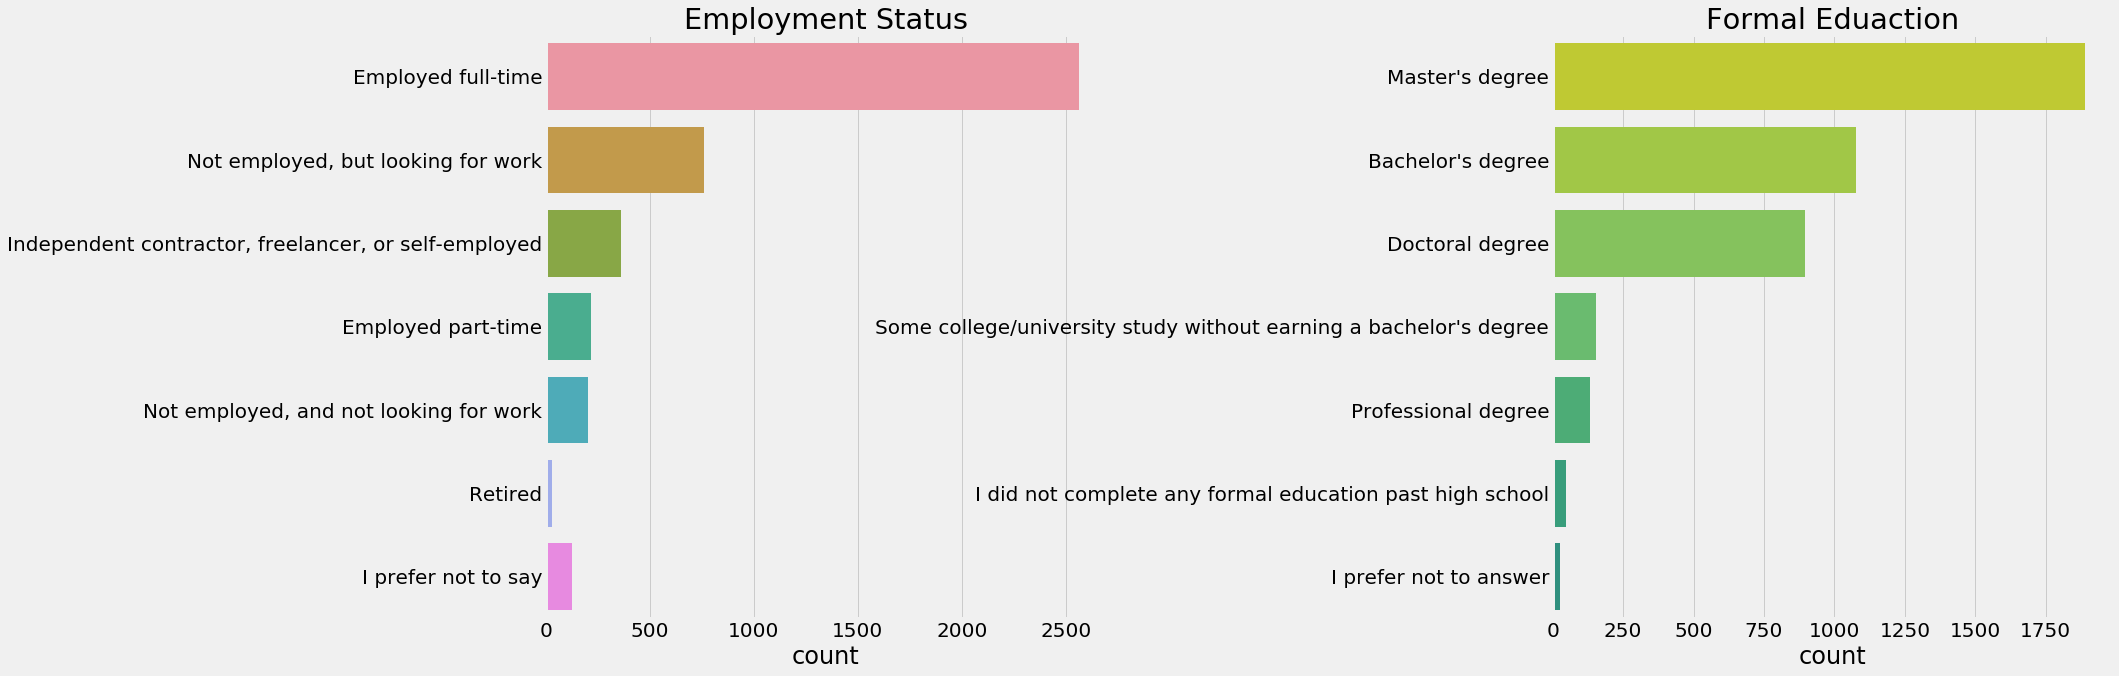

In [134]:
f,ax=plt.subplots(1,2,figsize=(25,10))

sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')

sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

大约67%的数据科学家都是全职，而大约11-12%都失业而找工作。在教育方面显然对76 %的数据科学家持有硕士学位，而约23-24%他们有学士学位或博士学位。因此，教育似乎是成为数据科学家的一个重要因素。让我们看看工资是如何根据教育而变化的。

## 学历跟工资挂钩吗

In [135]:
scientist.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Male,United States,58.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


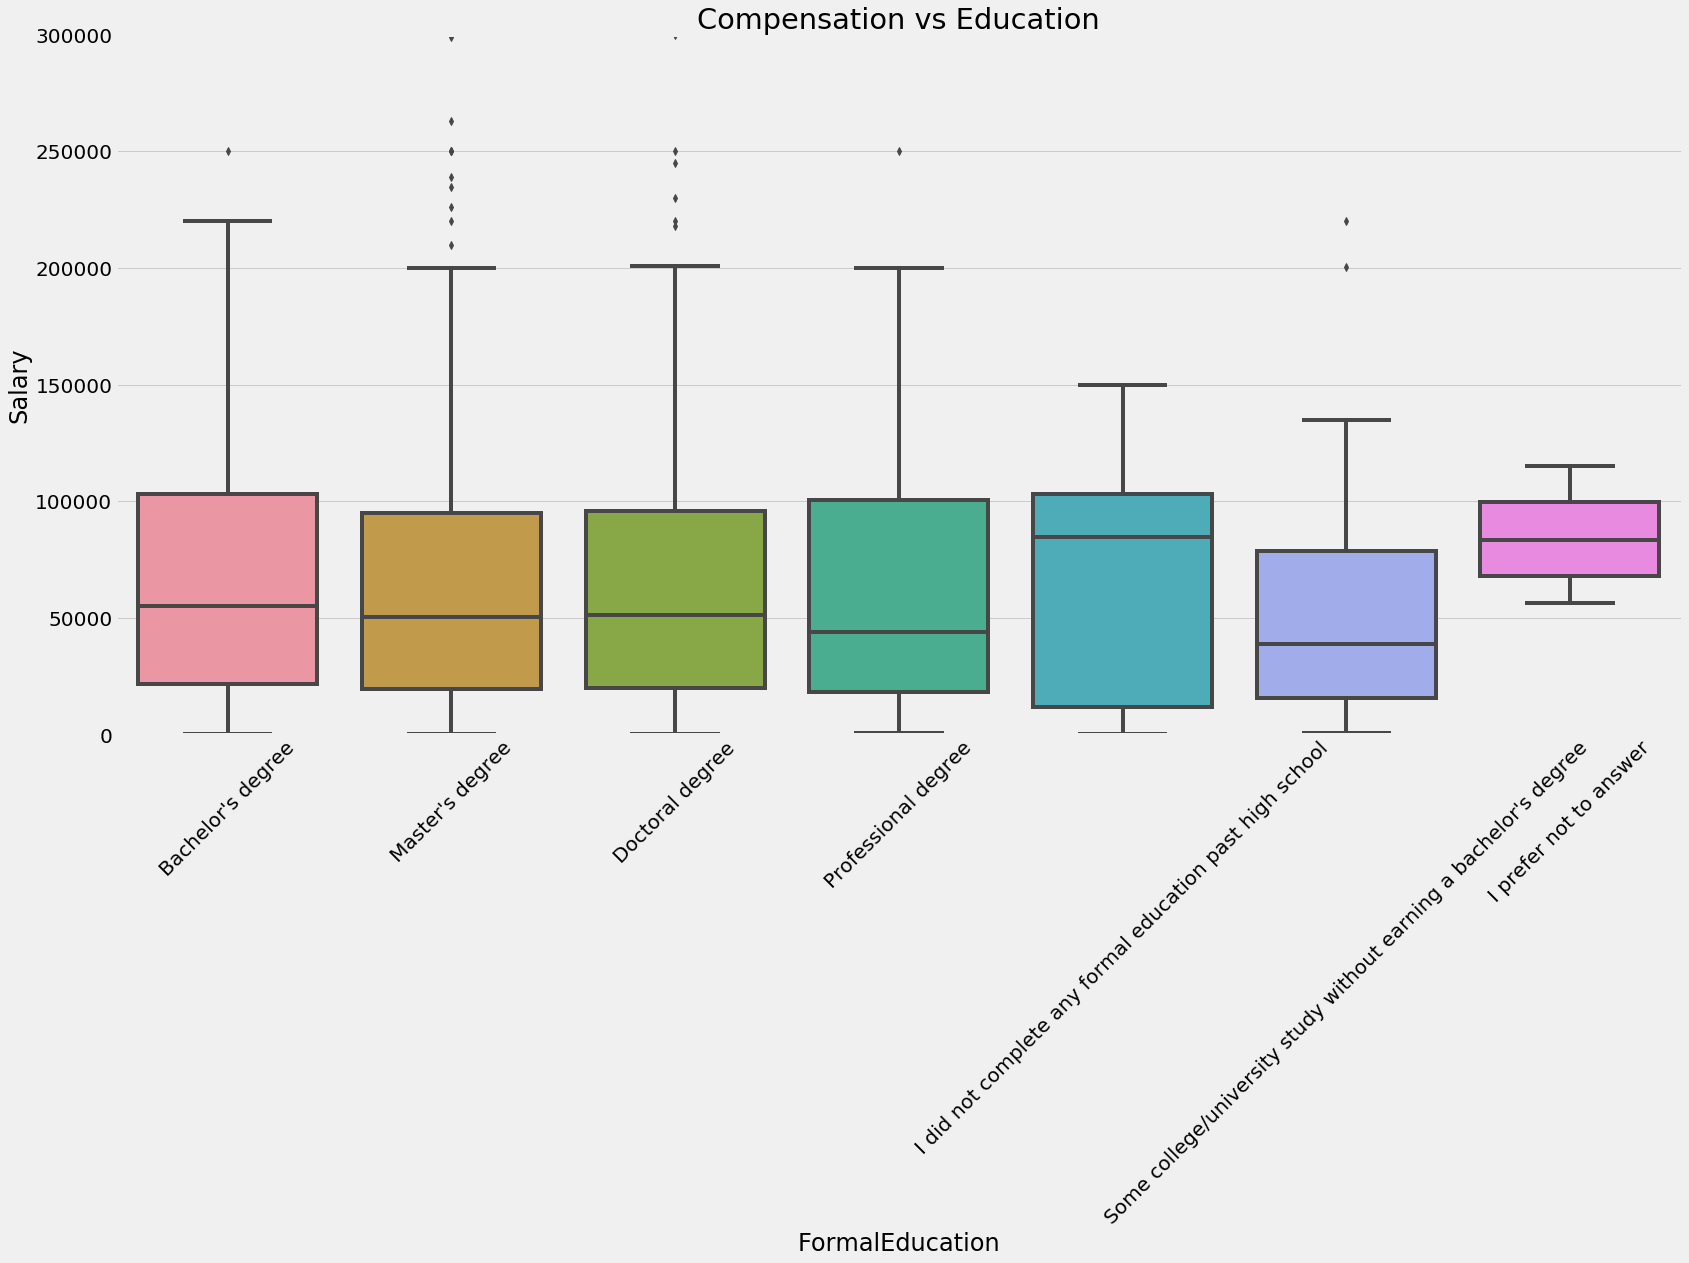

In [139]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left') 
# ↑用index做索引，merge两个Dataframe
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)

plt.title('Compensation vs Education')
plt.xticks(rotation=45)
plt.ylim(0,300000)
plt.show()

这是令人惊讶的，因为学士学位、硕士学位和博士学位的薪水范围非常相似。

## 前一份工作和现在的改变

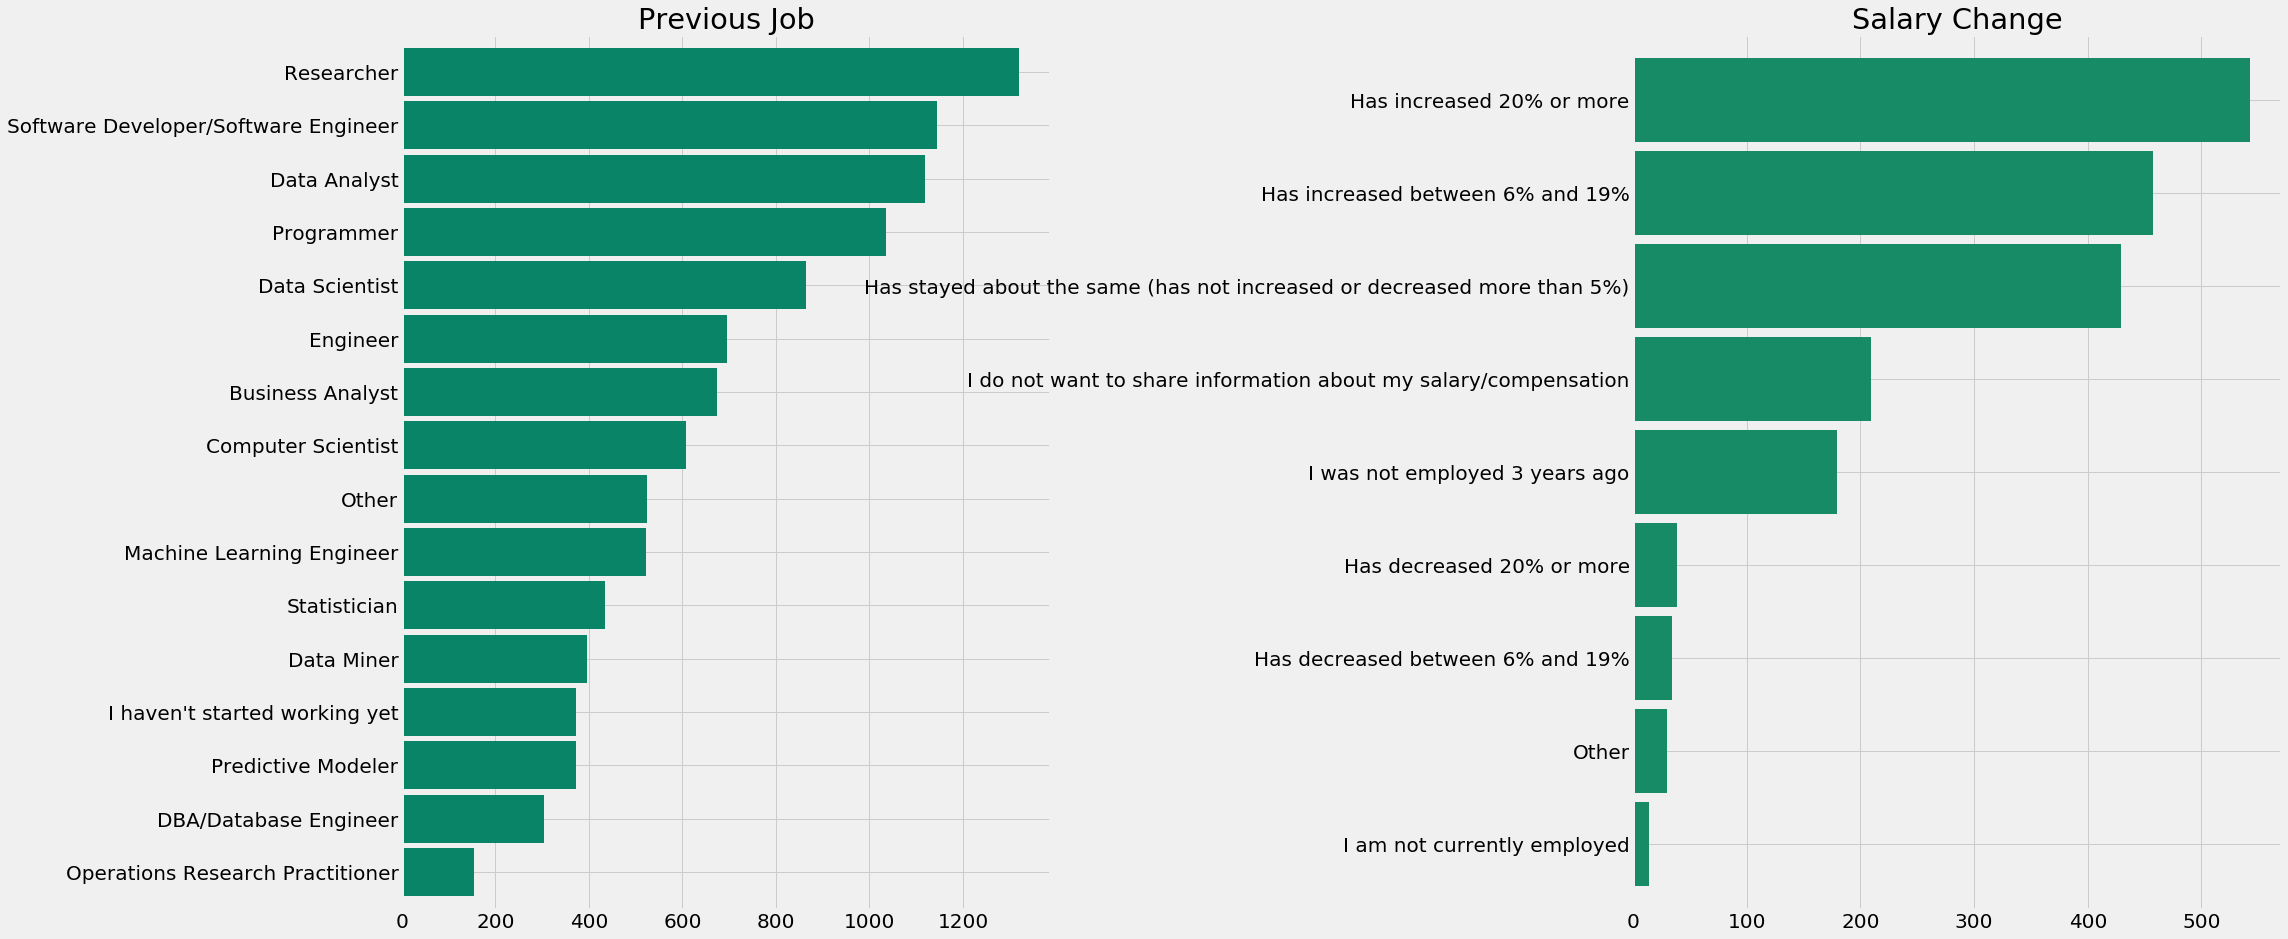

In [140]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

大部分还是涨了些工资的

## 数据科学家们都用什么

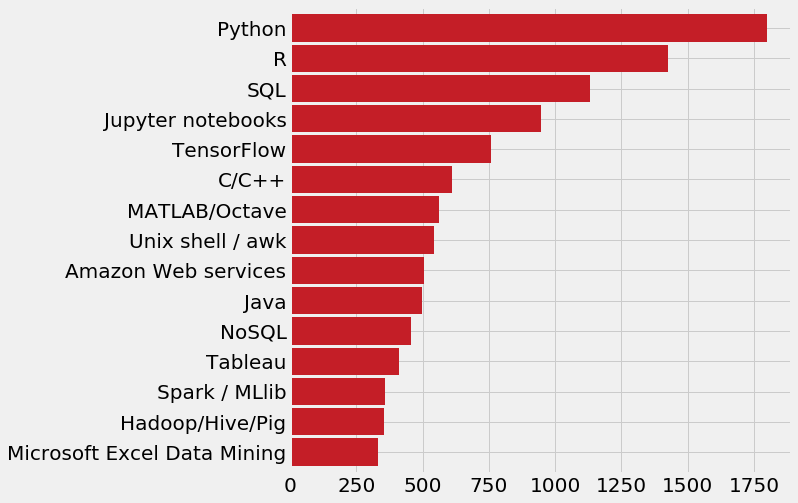

In [141]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()

## 时间都用于做什么了

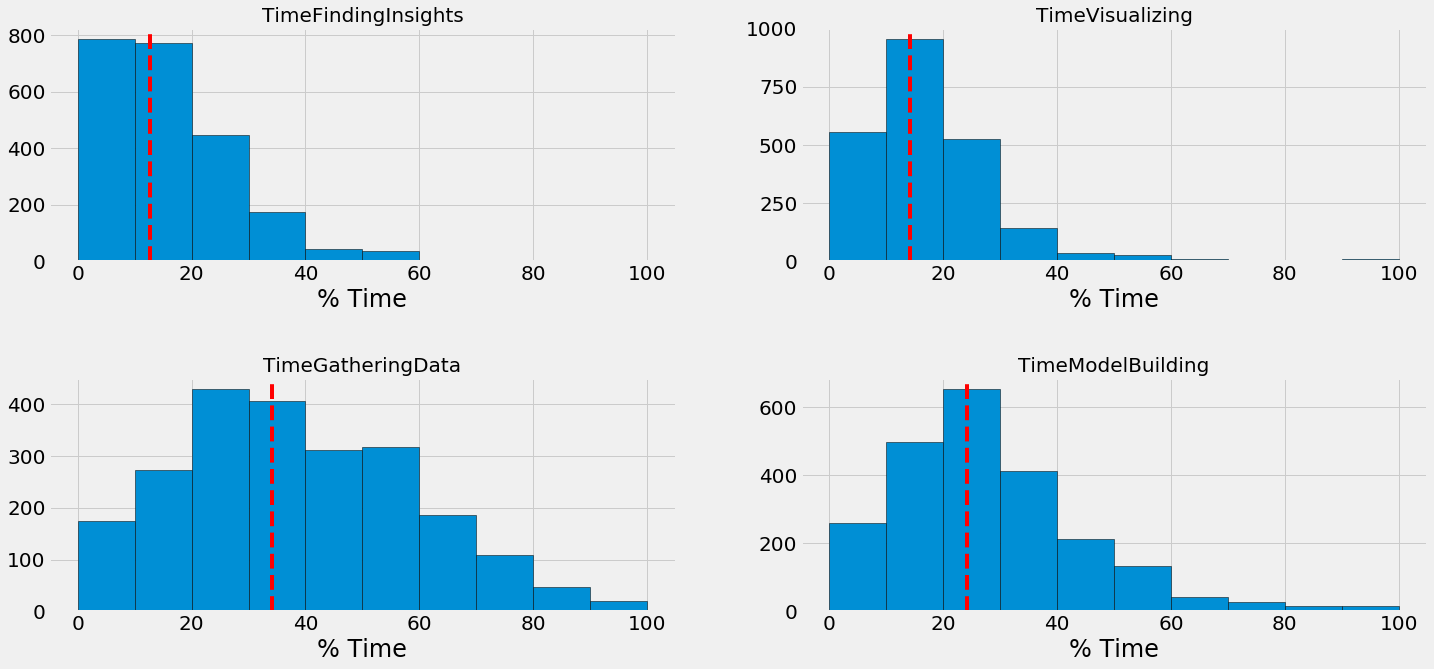

In [148]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)

# 注意下面itertools.zip_longest()的用法
for i,j in itertools.zip_longest(time_spent,range(length)): 
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5) # 设置图与图的间距
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r') # 虚线为中位数
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

# print(i,j)的结果如下
#   TimeFindingInsights  0
#   TimeVisualizing  1
#   TimeGatheringData  2
#   TimeModelBuilding  3

## 常用平台的使用频率

In [155]:
scientist['WorkToolsFrequencyAmazonML'].head()

0        NaN
1        NaN
2        NaN
3     Rarely
15       NaN
Name: WorkToolsFrequencyAmazonML, dtype: object

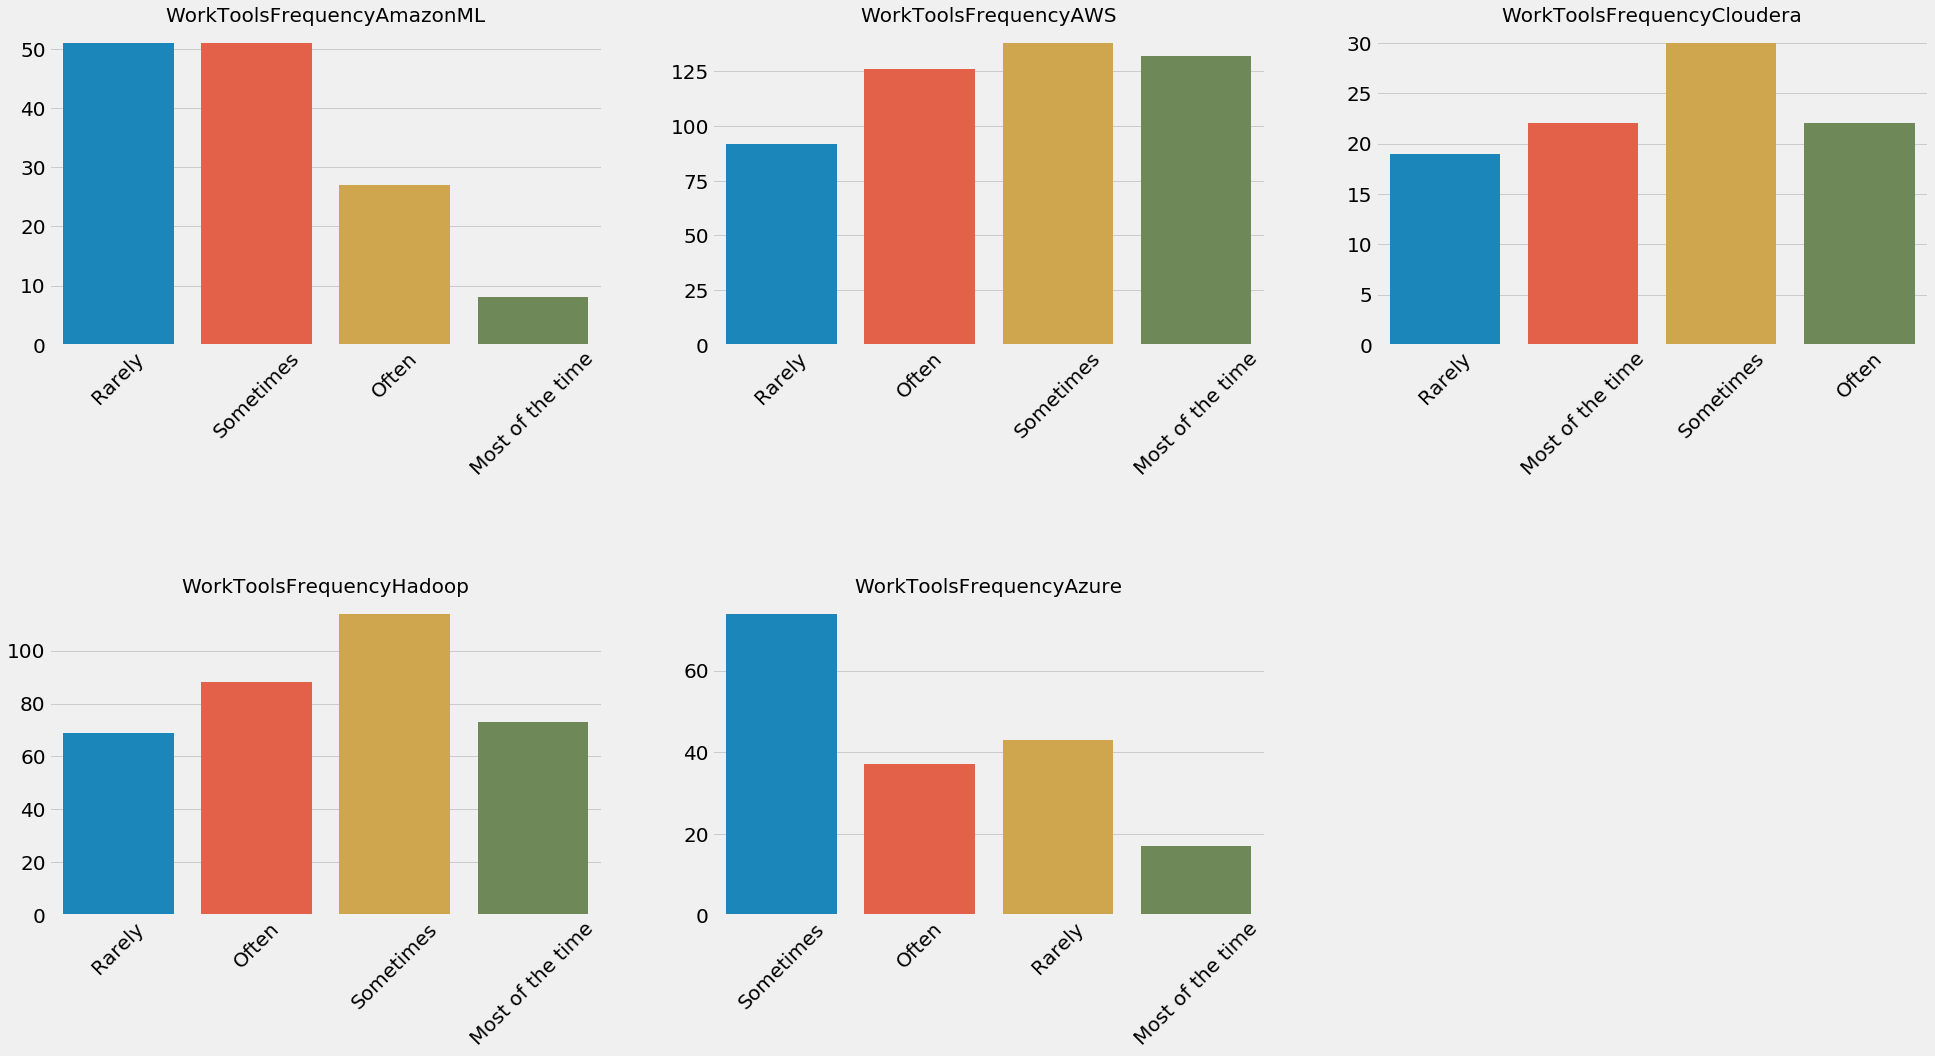

In [154]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,25))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.8)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.xticks(rotation=45)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

## 对可视化的重视程度

In [161]:
scientist['JobSkillImportanceVisualizations'][9:30]

29    Nice to have
33             NaN
37             NaN
39             NaN
48             NaN
50             NaN
53    Nice to have
55             NaN
58    Nice to have
59             NaN
          ...     
61             NaN
69             NaN
70       Necessary
73     Unnecessary
74             NaN
75             NaN
76    Nice to have
83             NaN
84       Necessary
86             NaN
Name: JobSkillImportanceVisualizations, Length: 21, dtype: object

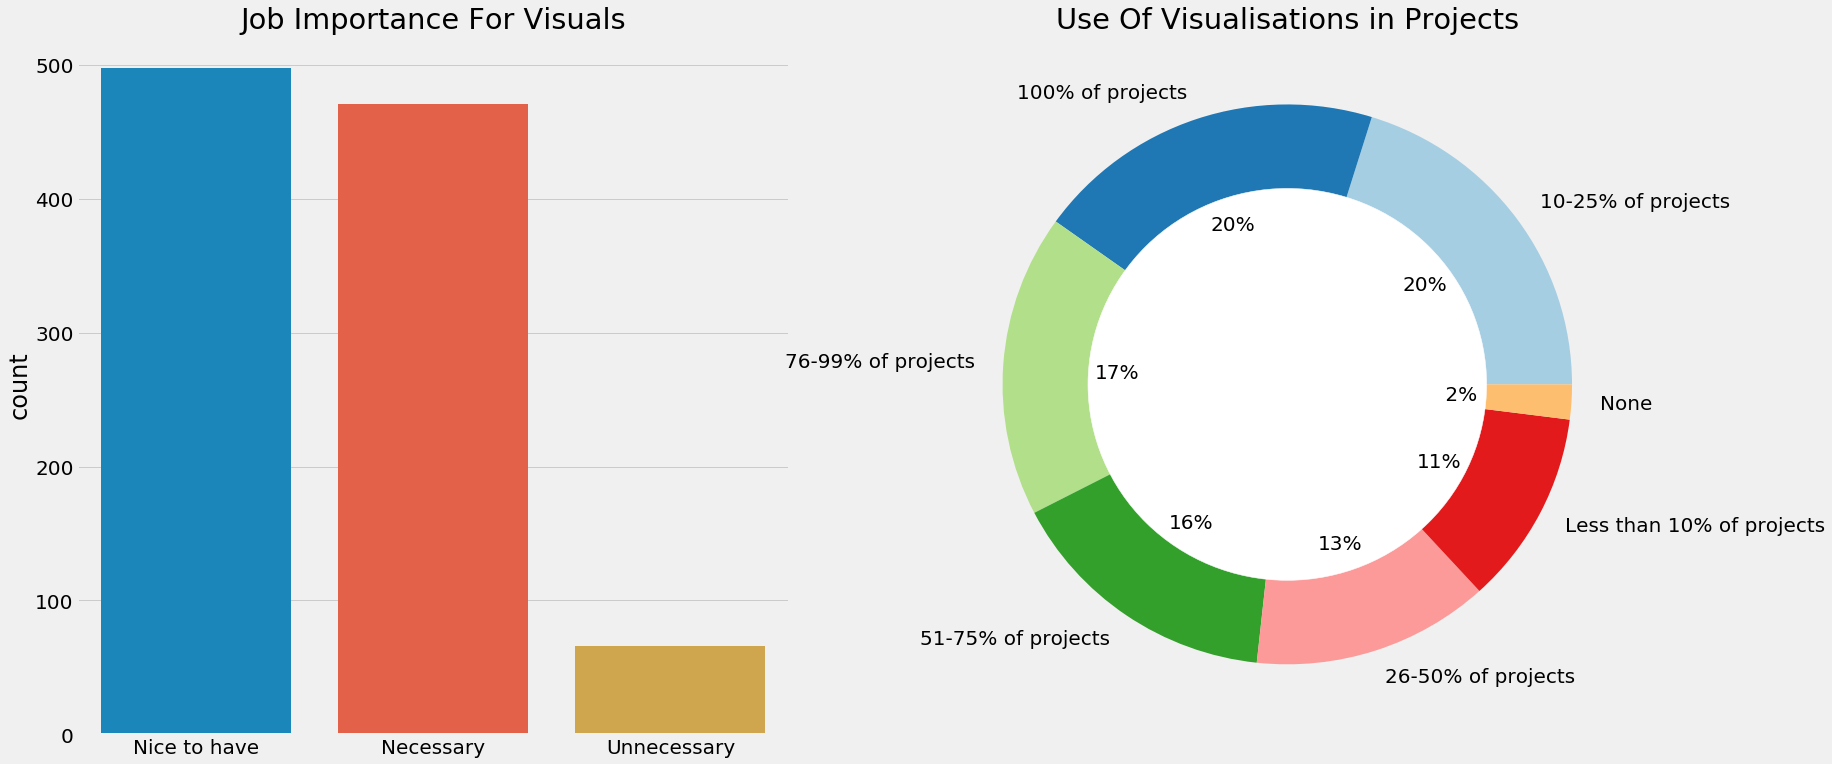

In [163]:
f,ax=plt.subplots(1,2,figsize=(25,12))

sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')

scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')

my_circle=plt.Circle( (0,0), 0.7, color='white') # ......①
p=plt.gcf()
p.gca().add_artist(my_circle) # ......②
# 如果不要①和②两行，则画出的是一个饼状图
plt.ylabel('')
plt.show()

可视化的数据科学项目不可或缺的一部分

## 如何证明自己的实力

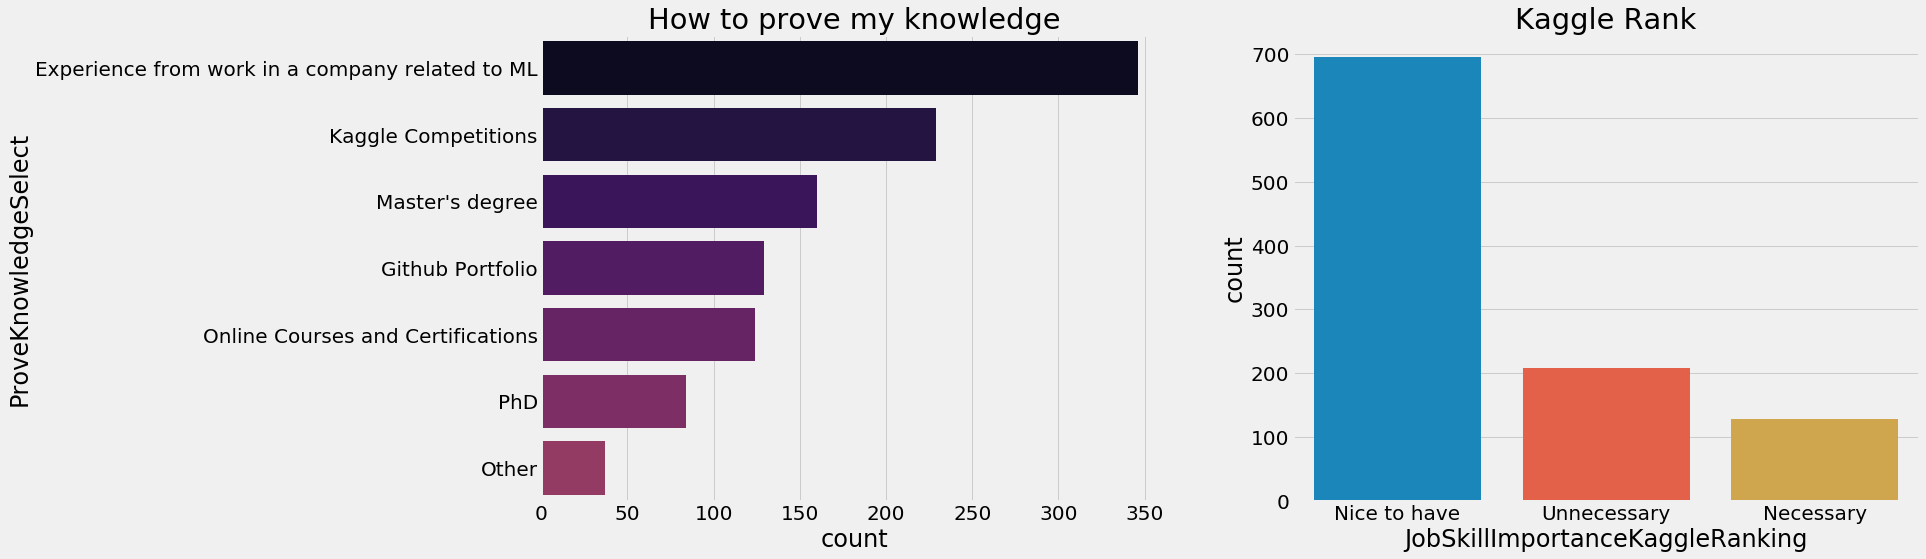

In [164]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')

sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

## 怎么找工作的？

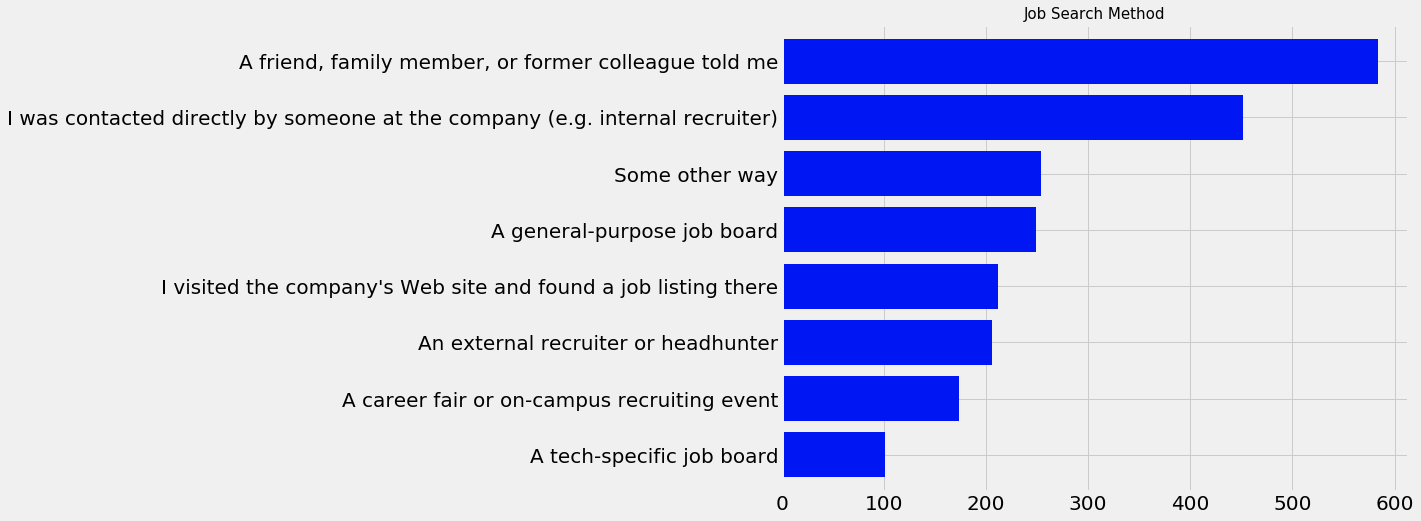

In [165]:
plt.subplots(figsize=(10,8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

许多数据科学家通过他们的朋友或亲戚了解工作，或者直接与公司联系。

## 在Python和R中最常用什么

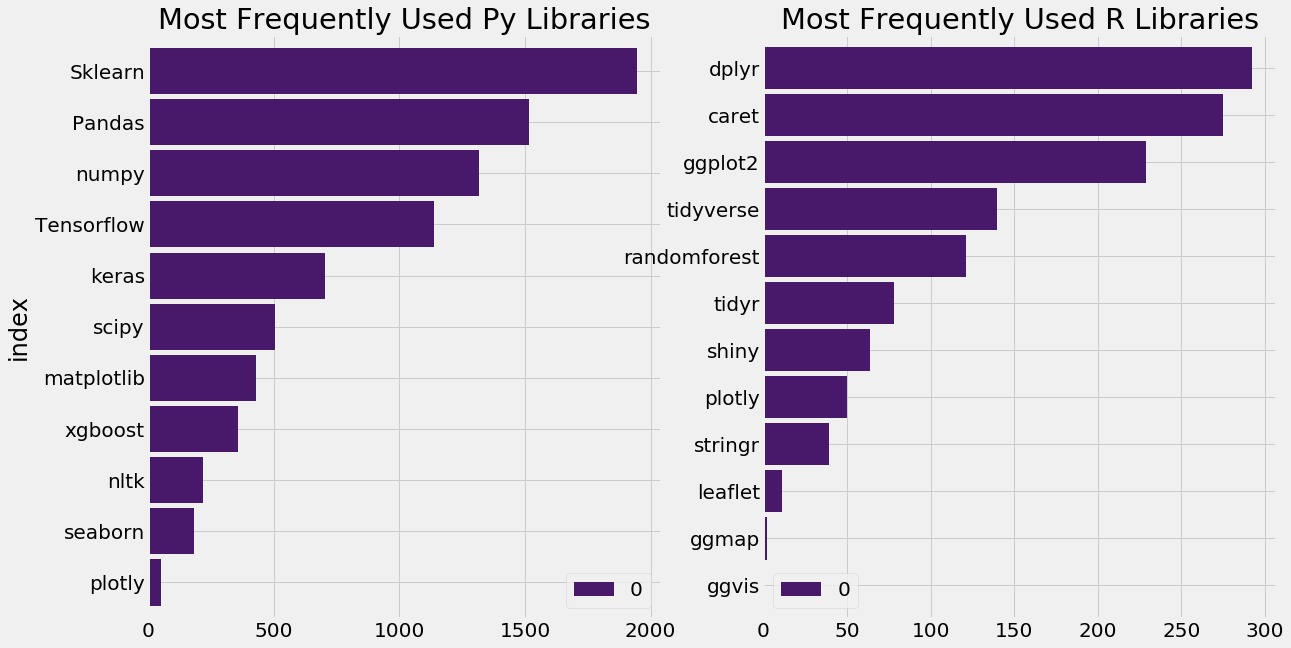

In [189]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

free=pd.read_csv('freeformResponses.csv',encoding='ISO-8859-1')
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
# .apply(nltk.word_tokenize)相当于把'python;scikit-learn; panda; numpy;'
# 变成了['python', ';', 'scikit-learn', ';', 'panda', ';', 'numpy', ';']
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words]) # 去除了停用词
lib=pd.Series(lib)
lib=lib.value_counts().reset_index() 
# reset_index()后，lib变成了dataframe，其中column分别为index和0，其中index为例如：python、panda等指标
# index为出现数量

# ↓lib.loc[…,'index']相当于唯一定位到某（些）个值
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()

R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']

f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('viridis',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('viridis',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

## Brief Summary:

1）大多数受访者来自美国.

2）大多数的受访者在年龄20-35岁，这表明数据科学的年轻人是很著名的。

3）调查对象不仅限于计算机科学专业，还包括统计学、健康科学等专业，数据科学是一门跨学科的领域。

4）大多数被调查者都被充分雇用。

5）Kaggle，在线课程（Coursera，edX，等），项目和博客（kdnuggets，analyticsvidya，等）是学习数据科学的首选资源。

6）Kaggle数据采集与GitHub的代码共享是大家非常喜欢的

7）数据科学家的工作满意度最高，相反程序员的工作满意度最低。

8）数据科学家也从以前的工作中获得的提升大约6～20%。

1）学习Python、R和SQL，因为它们是数据科学家最常用的语言。Python和R将有助于分析和预测建模，而SQL最适合查询数据库。

2）学习机器学习技术，如逻辑回归，决策树，支持向量机等，因为它们是最常用的机器学习技术/算法。

3）深学习和神经网络将是未来最受欢迎的技术，因此，精通它们将是非常有益的。

4）掌握收集数据和清理数据的技能，因为它们是数据科学家工作流程中最耗时的过程。

5）可视化是非常重要的数据科学项目以及几乎所有的项目都需要了解数据的可视化。

6）数学和统计在数据科学中是非常重要的，所以我们应该对它有很好的理解，以便真正理解算法是如何工作的。

7）根据数据科学家们说，项目是学习数据科学的最佳途径，因此，研究项目将有助于更好地学习数据科学。